# 📊 Portfolio Diversification and Risk Management Project

## 📝 Project Objective and Overview

The primary objective of this project is to develop a diversified financial portfolio strategy that balances risk and return by applying advanced financial techniques, feature engineering, and stress testing methods. The project involves the following key stages:

1. Data Collection, Preprocessing, and Feature Engineering

2. Exploratory Data Analysis (EDA)

3. Portfolio Diversification and Construction

4. Risk Management and Stress Testing

5. Strategy Development and Performance Evaluation

6. Ethical, Practical, and Strategic Considerations

7. Conclusion: Insights, Learning, and Future Work

The aim is to build a robust portfolio strategy that can withstand various market conditions while maximizing returns and minimizing risks.

### 📚 Section 1: Data Collection, Preprocessing, and Feature Engineering

To collect relevant financial data from various sources, preprocess the data to ensure quality and consistency, and apply feature engineering to extract meaningful insights.

#### 🔧 Importing Libraries

In [121]:
import yfinance as yf
from fredapi import Fred
from newsapi.newsapi_client import NewsApiClient
import pandas as pd
import numpy as np
import datetime
from textblob import TextBlob
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

#### 📋 Portfolio Diversification 
(diversified portfolio across sectors using yfinance)

- **Technology**	:  AAPL,  MSFT,  GOOGL
- **Healthcare** :	 JNJ,  PFE, UNH
- **Finance** :	 JPM,  BAC,  GS
- **Consumer Discretionary** :	 AMZN,  TSLA,  NKE
- **Energy** :	 XOM,  CVX,  BP

#### 📊 External Factors to Include
(Inflation, Oil Prices, Gold Prices, Interest Rate, Unemployment Rate) using fredapi

- Oil Prices (WTI Crude Oil)
- Gold Prices (as a safe haven asset)
- Unemployment Rate (macro risk)
- Inflation Rate (CPI)
- Interest Rates (Federal Funds Rate)

In [2]:
# --- 1. Portfolio: Diversified across sectors ---
portfolio = {
    "Technology": ['AAPL', 'MSFT', 'GOOGL'],
    "Healthcare": ['JNJ', 'PFE', 'UNH'],
    "Finance": ['JPM', 'BAC', 'GS'],
    "Consumer Discretionary": ['AMZN', 'TSLA', 'NKE'],
    "Energy": ['XOM', 'CVX', 'BP']
}

# --- 2. Economic Indicators to fetch from FRED ---
economic_indicators = {
    'Inflation': 'CPIAUCSL',        # Consumer Price Index
    'Oil Prices': 'DCOILWTICO',     # Crude Oil Prices
    'Interest Rate': 'FEDFUNDS',         # Federal Funds Rate
    'Unemployment Rate': 'UNRATE'   # Unemployment Rate
}

##### API setup with personal api key

In [3]:
# --- 3. News API Setup ---
newsapi = NewsApiClient(api_key='04f967b38efb4f17bd7d47ed17106e74') 

# --- 4. Set up FRED API ---
fred = Fred(api_key='45029743163a9757b8934bd605868e08')  


#### Sentiment Analysis 
(news headlines using newsapi-python)

In [29]:
# --- 5. Function to fetch stock data ---
def get_stock_data(assets, start_date, end_date):
    return yf.download(assets, start=start_date, end=end_date)['Adj Close']

# --- 6. Function to fetch economic indicators from FRED ---
def get_economic_data(indicators, start_date, end_date):
    econ_data = {}
    for name, series_id in indicators.items():
        try:
            data = fred.get_series(series_id, observation_start=start_date, observation_end=end_date)
            econ_data[name] = data
        except Exception as e:
            print(f"Error fetching {name}: {e}")
    return pd.DataFrame(econ_data)

# --- Fetch Gold Prices using yfinance ---
def get_gold_prices(start_date, end_date):
    gold_data = yf.download('GC=F', start=start_date, end=end_date)['Adj Close']
    return gold_data

# --- 7. Function to fetch sentiment data ---
def get_sentiment_data(keywords):
    sentiment_data = []
    for keyword in keywords:
        try:
            articles = newsapi.get_everything(
                q=keyword,
                from_param=(datetime.datetime.today() - datetime.timedelta(days=30)).strftime('%Y-%m-%d'),
                to=datetime.datetime.today().strftime('%Y-%m-%d'),
                language='en',
                sort_by='relevancy'
            )
            for article in articles['articles']:
                sentiment_data.append({
                    'keyword': keyword,
                    'title': article['title'],
                    'description': article['description'],
                    'published_at': article['publishedAt']
                })
        except Exception as e:
            print(f"Error fetching sentiment for {keyword}: {e}")
    return pd.DataFrame(sentiment_data)

# --- Add sentiment score to sentiment_data ---
def calculate_sentiment_score(text):
    if not text or pd.isna(text):
        return 0  # Return 0 for missing or empty descriptions
    return TextBlob(text).sentiment.polarity




In [30]:
# --- 8. Define date range ---
start_date = '2010-01-01'
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

# --- 9. Fetch stock data ---
stock_data = pd.DataFrame()
for sector, stocks in portfolio.items():
    sector_data = get_stock_data(stocks, start_date, end_date)
    stock_data = pd.concat([stock_data, sector_data], axis=1)

# --- 10. Fetch economic data ---
economic_data = get_economic_data(economic_indicators, start_date, end_date)
gold_prices = get_gold_prices(start_date, end_date)

# --- Combine economic data with gold prices ---
economic_data['Gold Prices'] = gold_prices

# --- 11. Fetch sentiment data ---
keywords = [stock for sector in portfolio.values() for stock in sector]
sentiment_data = get_sentiment_data(keywords)
sentiment_data['score'] = sentiment_data['description'].apply(calculate_sentiment_score)

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


**Problem faced while fetching the data:**

1. Gold Prices (Bad Request Error):
 - The GOLDAMGBD228NLBM series ID for gold prices is not available in the FRED API.
 
 **Solution:**
 Instead of using FRED, I have fetched gold prices from Yahoo Finance using the ticker symbol GC=F (Gold Futures).

2. NewsAPI Error (Date Range Issue):
 - The NewsAPI free plan only allows fetching news from the last 30 days. We are requesting data starting from 2010, which exceeds the free plan limit.

 **Solution:**
 To handle the NewsAPI limitation, reduce the date range to the last 30 days for sentiment analysis.

#### 📁 Outputs:
1. **stock_data** – Historical stock prices for a diversified portfolio.
2. **economic_data** – Macro indicators like CPI, GDP, Oil Prices, Gold Prices, etc.
3. **sentiment_data** – Sentiment data from financial news.

In [31]:
stock_data.head()
economic_data.head()
sentiment_data.head()

keyword                                              title  \
0    AAPL  Stock market today: Dow ekes out gains, bitcoi...   
1    AAPL      Apple Set to Become First $4 Trillion Company   
2    AAPL  Apple could hit a $4 trillion market cap by ea...   
3    AAPL  Apple is giving discounts on iPhones in China ...   
4    AAPL    Apple users can now access ChatGPT through Siri   

                                         description          published_at  \
0  US stocks were set to open post-Christmas trad...  2024-12-26T17:52:35Z   
1  Apple is on the brink of becoming the first co...  2024-12-27T13:58:10Z   
2  Apple’s (AAPL) artificial intelligence rollout...  2024-12-23T13:20:00Z   
3  Apple (AAPL) is giving its Chinese customers a...  2025-01-02T15:55:00Z   
4  Apple (AAPL) unveiled a slate of new artificia...  2024-12-11T13:35:00Z   

      score  
0  0.000000  
1  0.266667  
2  0.009091  
3  0.166667  
4  0.159091

- ✅ Diversifying the portfolio across sectors (tech, healthcare, finance, etc.).
- ✅ Including sentiment analysis using news headlines.
- ✅ Fetching external macroeconomic factors (oil prices, gold prices, inflation, interest rates, unemployment rate, etc.).
- ✅ Enhancing the data processing by combining these datasets into a single DataFrame.



#### Preprocessing the Data for Portfolio Analysis

1. **Handle Missing Values:**
 - Use forward fill or backward fill for time series.
 - For stock data, missing values can occur due to non-trading days (weekends, holidays).
2. **Remove Noise:**
 - Remove outliers in economic data.
 - Filter irrelevant sentiment data (e.g., articles with empty descriptions).
3. Data Consistency:
 - Ensure date alignment between datasets.
 - Standardize data formats (e.g., date format).

In [32]:

# --- 1. Preprocessing Stock Data ---
def preprocess_stock_data(data):
    # Fill missing values using forward fill
    data = data.ffill().bfill()
    
    # Check for remaining missing values
    if data.isnull().sum().sum() > 0:
        print("Warning: Some missing values remain in the stock data!")
    return data

stock_data = preprocess_stock_data(stock_data)

# --- 2. Preprocessing Economic Data ---
def preprocess_economic_data(data):
    # Fill missing values with forward fill, then backward fill
    data = data.ffill().bfill()
    
    # Remove outliers by capping values at 99th percentile
    for col in data.columns:
        upper_limit = data[col].quantile(0.99)
        lower_limit = data[col].quantile(0.01)
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

economic_data = preprocess_economic_data(economic_data)

# --- 3. Preprocessing Sentiment Data ---
def preprocess_sentiment_data(data):
    # Remove duplicates
    data = data.drop_duplicates(subset=['title'])
    
    # Remove articles with missing descriptions
    data = data.dropna(subset=['description'])
    
    # Convert published_at to datetime
    data['published_at'] = pd.to_datetime(data['published_at'])
    
    # Sort by published date
    data = data.sort_values(by='published_at')
    
    return data

sentiment_data = preprocess_sentiment_data(sentiment_data)

# --- 4. Align Dates Between Datasets ---
def align_datasets(stock_data, economic_data):
    # Ensure the datasets have the same date range
    common_dates = stock_data.index.intersection(economic_data.index)
    stock_data = stock_data.loc[common_dates]
    economic_data = economic_data.loc[common_dates]
    return stock_data, economic_data

stock_data, economic_data = align_datasets(stock_data, economic_data)


#### Feature Engineering
This feature engineering pipeline includes the following:

1. **Technical Indicators:**
 - SMA, EMA, RSI, Bollinger Bands, MACD
2. **Volatility and Risk Metrics:**
 - Beta, Drawdowns, Rolling Sharpe Ratio
3. **Momentum Features:**
 - Rate of Change (ROC), Stochastic Oscillator
4. **Seasonality and Time-Based Features:**
 - Month, Quarter, Day of the Week, Holiday Effects
5. **Correlation and Co-Movement:**
 - Rolling Correlation with a market index (e.g., S&P 500)
6. **Sentiment-Based Features:**
 - Sentiment Score from news data
7. **Statistical Features:**
 - Z-Score, Autocorrelation

In [33]:

# --- Fetch S&P 500 Index Data ---
sp500_data = yf.download('^GSPC', start='2010-01-01', end='2025-01-01')

# --- Preprocessing ---
# Reset the index to move Date from the index to a column
sp500_data.reset_index(inplace=True)

# Flatten the MultiIndex columns
sp500_data.columns = ['Date' if col[0] == '' else col[0] for col in sp500_data.columns]

# Select Date and Adj Close columns
sp500_data = sp500_data[['Date', 'Adj Close']].copy()

# Rename Adj Close to SP500
sp500_data.rename(columns={'Adj Close': 'SP500'}, inplace=True)

# Round the SP500 values to two decimal places
sp500_data['SP500'] = sp500_data['SP500'].round(2)

# Ensure Date is the index in sp500_data
if 'Date' in sp500_data.columns:
    sp500_data.set_index('Date', inplace=True)

# Convert index to datetime if not already
sp500_data.index = pd.to_datetime(sp500_data.index)

# Display the cleaned DataFrame
print(sp500_data.head())


[*********************100%***********************]  1 of 1 completed

              SP500
Date               
2010-01-04  1132.99
2010-01-05  1136.52
2010-01-06  1137.14
2010-01-07  1141.69
2010-01-08  1144.98


***Problem faced while fetching sp500 data from Yfinance (Handling MultiIndex Columns in YFinance Data)***

**Problem**
When fetching the S&P 500 index data using the yfinance library, the downloaded data contains MultiIndex columns, which makes it difficult to select and process specific columns like Adj Close.

**Issue Reproduction**
The issue occurs because sp500_data columns are not simple column labels, but rather a MultiIndex structure.

**Solution**
Steps to Fix the MultiIndex Issue:
1. Flatten the MultiIndex columns to make them easier to access.
2. Select the Adj Close column (or fallback to Close if needed).
3. Rename the column to SP500 for clarity.
4. Round the values to two decimal places for a cleaner output.
5. Ensure Date is the index in sp500_data
6. Convert index to datetime if not already

In [34]:
# --- Merge S&P 500 Data with Stock Data ---
stock_data = pd.merge(stock_data, sp500_data, left_index=True, right_index=True, how='inner')

# --- Get the list of all stocks in the dataset ---
stocks = [col for col in stock_data.columns if col != 'SP500']


In [37]:

# --- 1. Technical Indicators ---
def calculate_technical_indicators(data, stocks):
    for stock in stocks:
        # Simple Moving Average (SMA)
        data[f'{stock}_SMA_20'] = data[stock].rolling(window=20).mean()
        data[f'{stock}_SMA_50'] = data[stock].rolling(window=50).mean()

        # Exponential Moving Average (EMA)
        data[f'{stock}_EMA_20'] = data[stock].ewm(span=20, adjust=False).mean()

        # Relative Strength Index (RSI)
        delta = data[stock].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data[f'{stock}_RSI'] = 100 - (100 / (1 + rs))

        # Bollinger Bands
        data[f'{stock}_BB_Upper'] = data[f'{stock}_SMA_20'] + (2 * data[stock].rolling(window=20).std())
        data[f'{stock}_BB_Lower'] = data[f'{stock}_SMA_20'] - (2 * data[stock].rolling(window=20).std())

        # MACD
        ema_12 = data[stock].ewm(span=12, adjust=False).mean()
        ema_26 = data[stock].ewm(span=26, adjust=False).mean()
        data[f'{stock}_MACD'] = ema_12 - ema_26

    return data

# --- 2. Volatility and Risk Metrics ---
def calculate_risk_metrics(data, stocks):
    for stock in stocks:
        # Daily Returns
        returns = data[stock].pct_change()
        market_returns = data['SP500'].pct_change()

        # Beta
        cov_matrix = np.cov(returns[1:], market_returns[1:])
        beta = cov_matrix[0, 1] / cov_matrix[1, 1]
        data[f'{stock}_Beta'] = beta

        # Drawdowns
        roll_max = data[stock].cummax()
        daily_drawdown = data[stock] / roll_max - 1.0
        data[f'{stock}_Drawdown'] = daily_drawdown

        # Rolling Sharpe Ratio
        risk_free_rate = 0.01
        data[f'{stock}_Rolling_Sharpe'] = (returns - risk_free_rate).rolling(window=252).mean() / returns.rolling(window=252).std() * np.sqrt(252)

    return data

# --- 3. Momentum Features ---
def calculate_momentum_features(data, stocks):
    for stock in stocks:
        # Rate of Change (ROC)
        data[f'{stock}_ROC'] = data[stock].pct_change(periods=10)

        # Stochastic Oscillator
        low_14 = data[stock].rolling(window=14).min()
        high_14 = data[stock].rolling(window=14).max()
        data[f'{stock}_Stochastic'] = 100 * ((data[stock] - low_14) / (high_14 - low_14))

    return data

# --- 4. Seasonality and Time-Based Features ---
def add_time_features(data):
    data['Month'] = data.index.month
    data['Quarter'] = data.index.quarter
    data['Day_of_Week'] = data.index.dayofweek
    
    # Holiday Effects
    holidays = pd.to_datetime(['2025-01-01', '2025-12-25'])  # Add more holidays as needed
    data['Is_Holiday'] = data.index.isin(holidays).astype(int)

    return data

# --- 5. Correlation and Co-Movement ---
def calculate_rolling_correlation(data, stocks, window=60):
    # Ensure the window parameter is an integer
    window = int(window)

    for stock in stocks:
        # Calculate the rolling correlation with SP500
        data[f'{stock}_Rolling_Correlation'] = (
            data[stock].rolling(window=window).corr(data['SP500'])
        )

    return data


# --- 6. Sentiment-Based Features ---
def add_sentiment_features(data, sentiment_data):
    sentiment_data['published_at'] = pd.to_datetime(sentiment_data['published_at'])
    sentiment_score = sentiment_data.groupby(sentiment_data['published_at'].dt.date)['score'].mean()
    sentiment_score.index = pd.to_datetime(sentiment_score.index)
    for stock in stocks:
        data[f'{stock}_Sentiment_Score'] = sentiment_score.reindex(data.index).fillna(0)
    return data

# --- 7. Statistical Features ---
def calculate_statistical_features(data, stocks):
    for stock in stocks:
        # Z-Score
        data[f'{stock}_Z_Score'] = zscore(data[stock])

        # Autocorrelation
        data[f'{stock}_Autocorrelation'] = data[stock].autocorr(lag=1)

    return data

# --- Apply all feature engineering functions ---
stock_data = calculate_technical_indicators(stock_data, stocks)
stock_data = calculate_risk_metrics(stock_data, stocks)
stock_data = calculate_momentum_features(stock_data, stocks)
stock_data = add_time_features(stock_data)
stock_data = calculate_rolling_correlation(stock_data, stocks, window=60)
stock_data = add_sentiment_features(stock_data, sentiment_data)
stock_data = calculate_statistical_features(stock_data, stocks)

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1344187733.py:104: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{stock}_Z_Score'] = zscore(data[stock])
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1344187733.py:107: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{stock}_Autocorrelation'] = data[stock].autocorr(lag=1)
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1344187733.py:104: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

### 📈 Section 2: Exploratory Data Analysis (EDA)

To explore the relationships, patterns, and correlations in the data to identify diversification opportunities and potential market anomalies.

**For this EDA step, we’ll cover:**

1. Descriptive Statistics – Summary statistics for each stock and feature.
2. Correlation Matrix – Heatmap of correlations between assets and economic factors like SP500, Sentiment Scores, etc.
3. Rolling Statistics – Explore rolling mean, volatility, and correlations to see time-based patterns.
4. Outlier Detection – Identify potential outliers using Z-Score and visualize them.
5. Sector-Level Analysis – Aggregate insights by sector to spot broader patterns.
6. Distribution Plots – To show the distribution of stock returns and detect skewness or kurtosis.
7. Pair Plot (Scatter Matrix) – To uncover relationships and clusters between different features.
8. Heatmap for Rolling Correlations – To track correlations between stocks over time.
9. Outlier Detection with Boxplots – To visualize outliers in the stock prices.

In [41]:
# --- 1. Descriptive Statistics ---
print("Descriptive Statistics:")
print(stock_data.describe())

Descriptive Statistics:
              AAPL        GOOGL         MSFT          JNJ          PFE  \
count  3774.000000  3774.000000  3774.000000  3774.000000  3774.000000   
mean     67.595929    61.220203   129.838131   100.824904    24.491008   
std      65.674802    46.692069   125.238486    41.242797     9.669384   
min       5.785830    10.873247    17.482595    37.341393     7.643890   
25%      17.480877    22.607487    28.829882    66.491470    17.952745   
50%      35.362553    47.206123    65.115776   102.741844    23.779186   
75%     127.049145    93.580757   228.993660   143.831585    30.306652   
max     259.019989   196.660004   465.786438   171.606262    53.479511   

               UNH          BAC           GS          JPM         AMZN  ...  \
count  3774.000000  3774.000000  3774.000000  3774.000000  3774.000000  ...   
mean    216.638280    20.762622   204.810380    81.463701    71.444840  ...   
std     174.373130    10.694184   105.720555    50.828864    61.124111  

/Users/sakshiii/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [42]:
plt.style.use('dark_background')

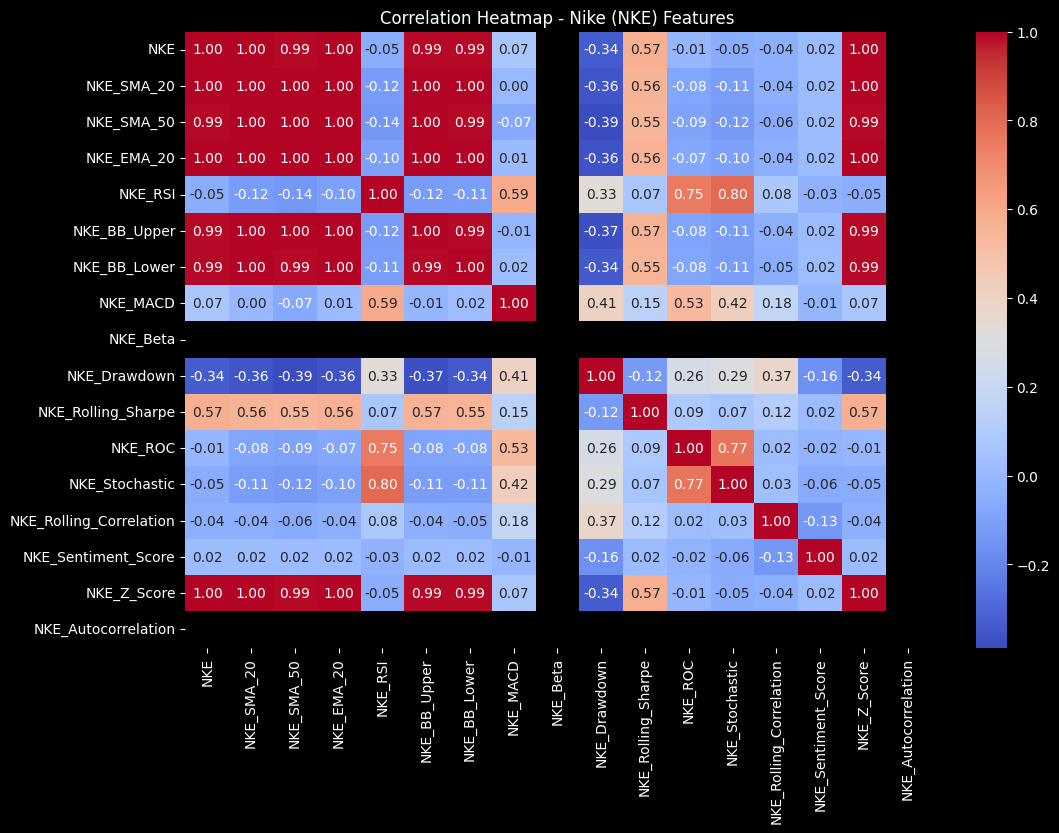

In [44]:
# --- 2. Correlation Matrix ---

# --- Filter columns related to NKE ---
nke_columns = [col for col in stock_data.columns if 'NKE' in col]

# --- Calculate correlation matrix for NKE ---
nke_corr_matrix = stock_data[nke_columns].corr()

# --- Plot the heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(nke_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap - Nike (NKE) Features")
plt.show()


**Anomalies found through Correlation heatmap**

1. **Constant Values:**
 - Some features (e.g., NKE_Beta) has a constant value across all rows, the standard deviation becomes zero. This makes the correlation undefined, resulting in a black cell.

 **Solutions:**
 We will drop these features because:
 1. They provide no new information.
 2. They don’t contribute to correlations.
 3. They can negatively impact machine learning models.

In [50]:
# Check for constant columns
constant_columns = [col for col in stock_data.columns if stock_data[col].nunique() == 1]

# Drop constant columns
stock_data.drop(columns=constant_columns, inplace=True)

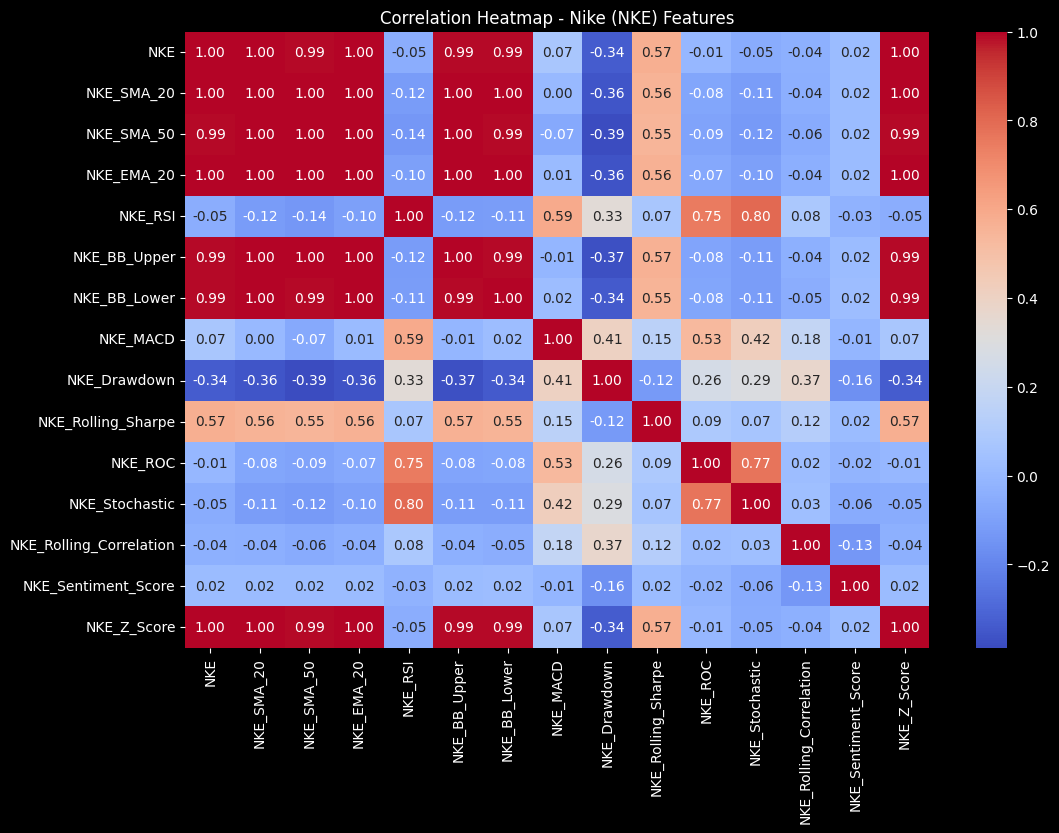

In [51]:
# --- Filter columns related to NKE ---
nke_columns = [col for col in stock_data.columns if 'NKE' in col]

# --- Calculate correlation matrix for NKE ---
nke_corr_matrix = stock_data[nke_columns].corr()

# --- Plot the heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(nke_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap - Nike (NKE) Features")
plt.show()

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()


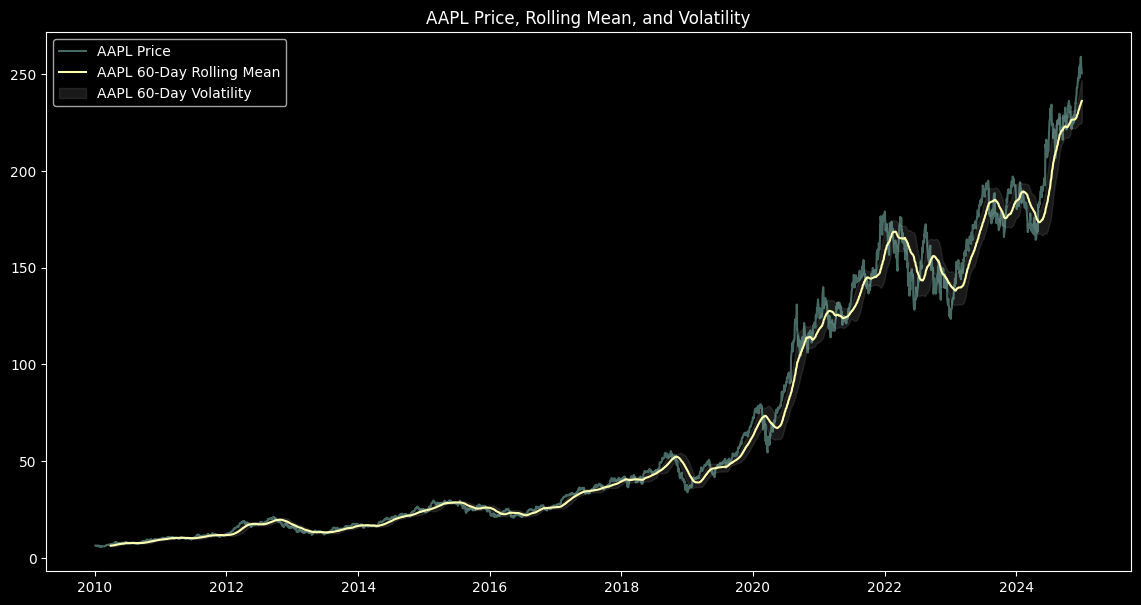

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()


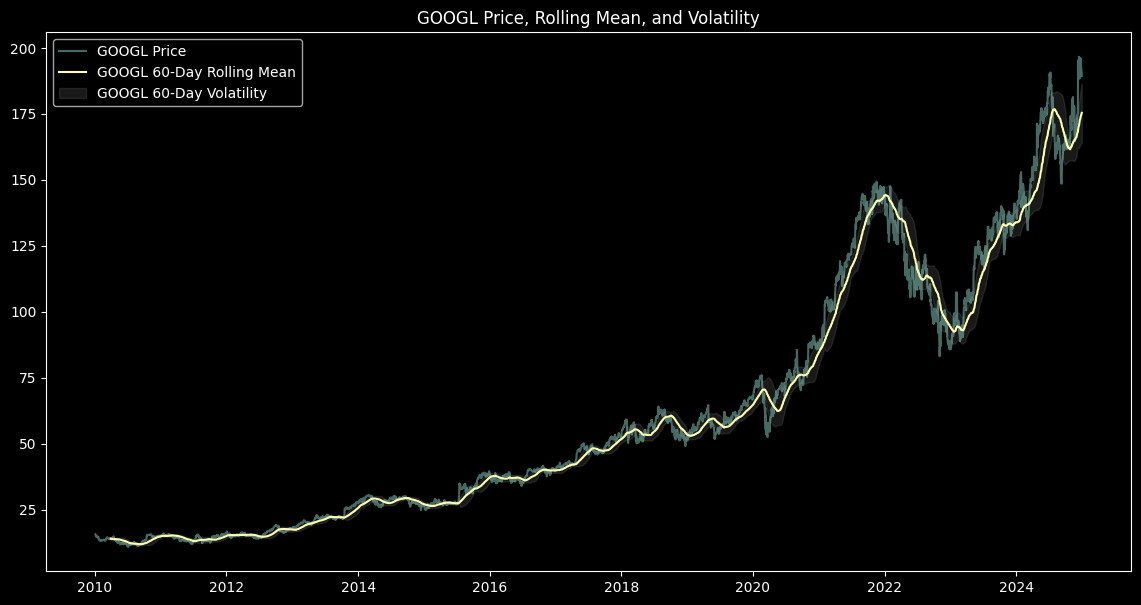

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()


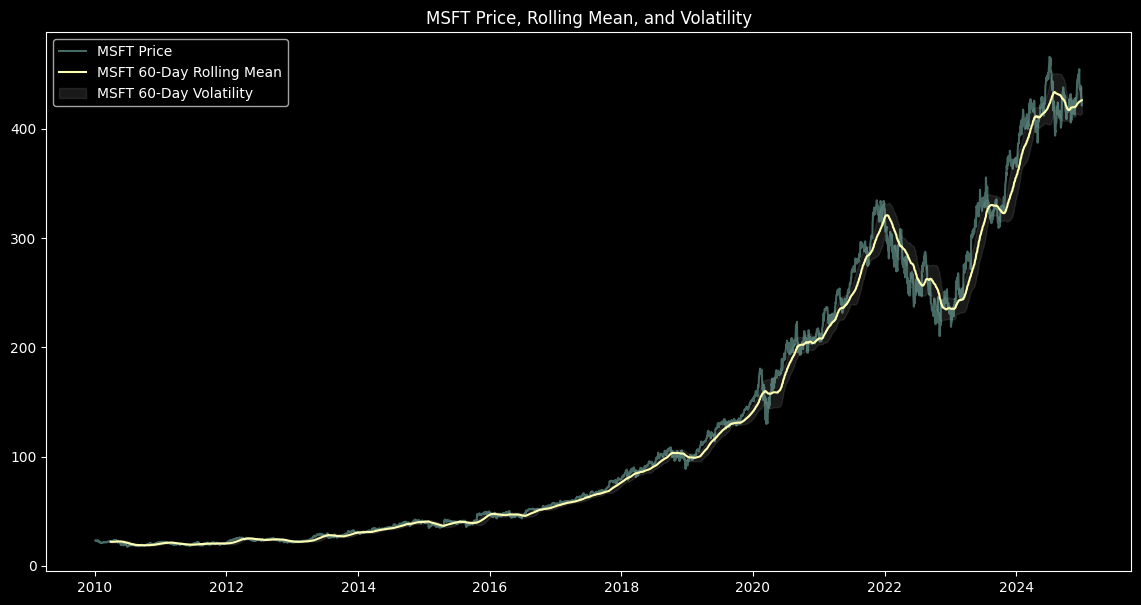

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()


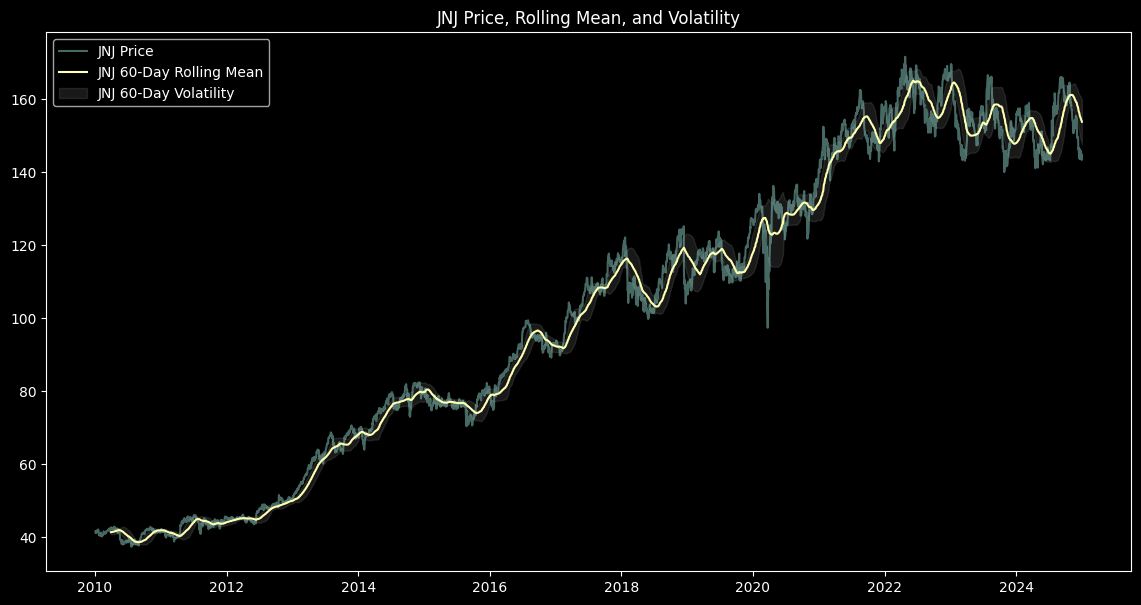

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()


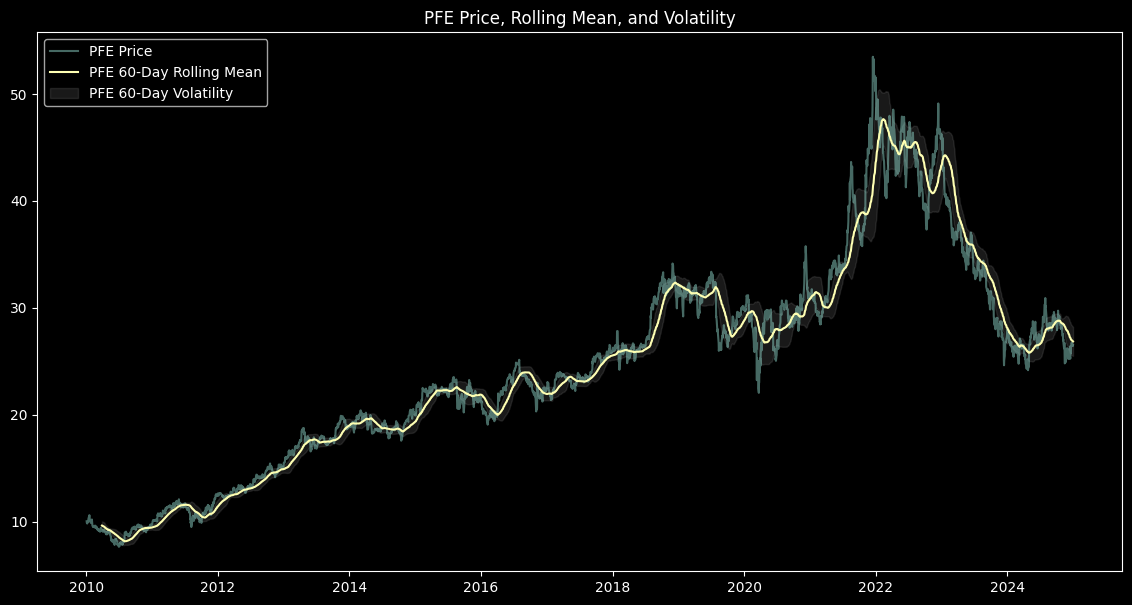

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()


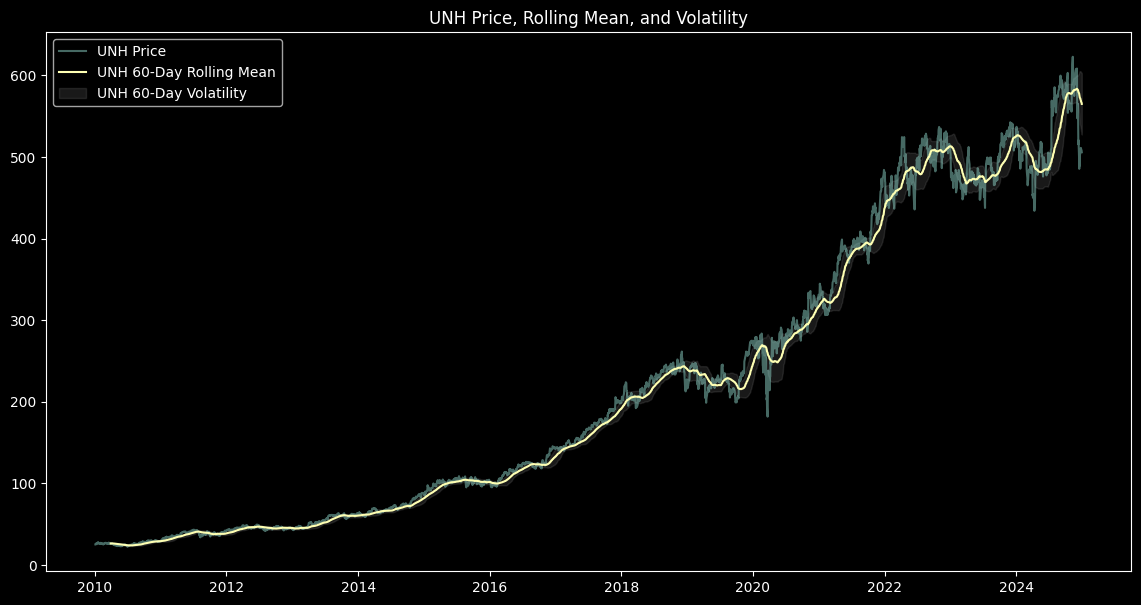

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()


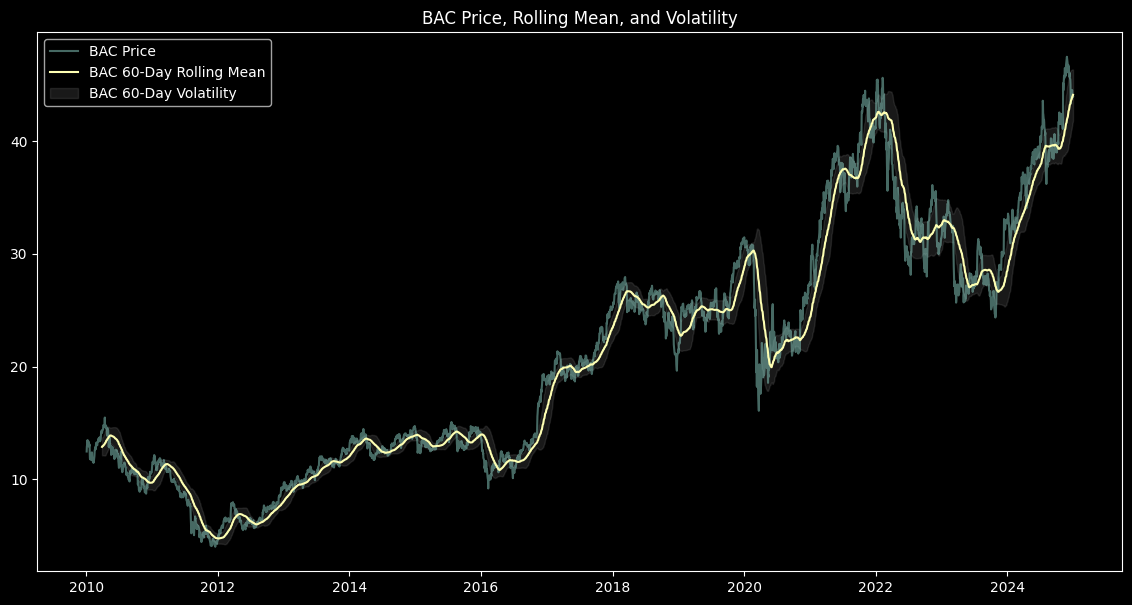

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()


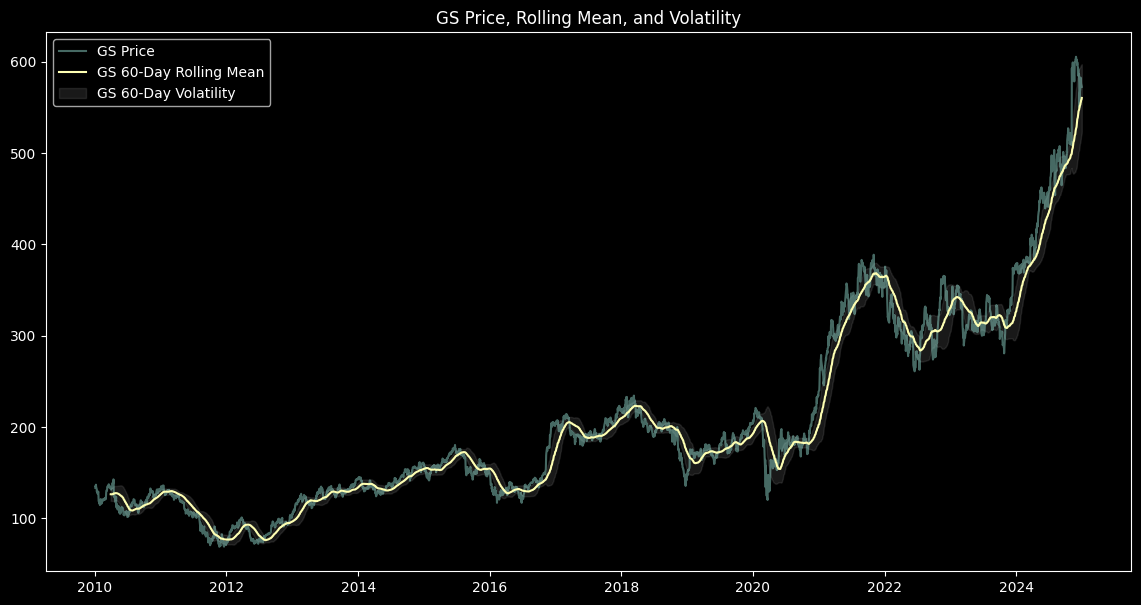

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()


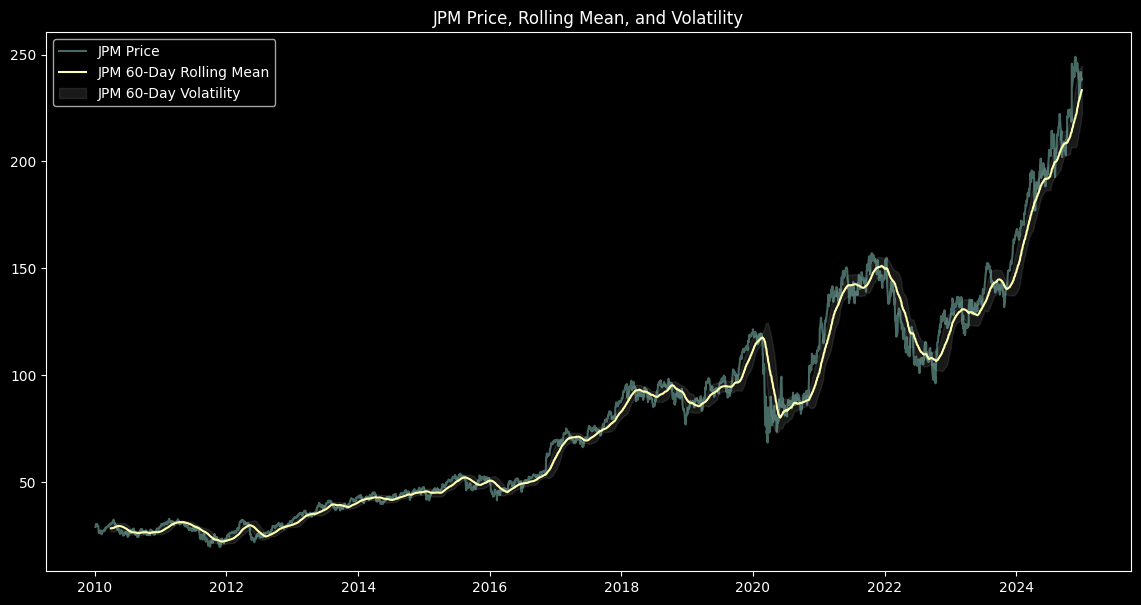

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()


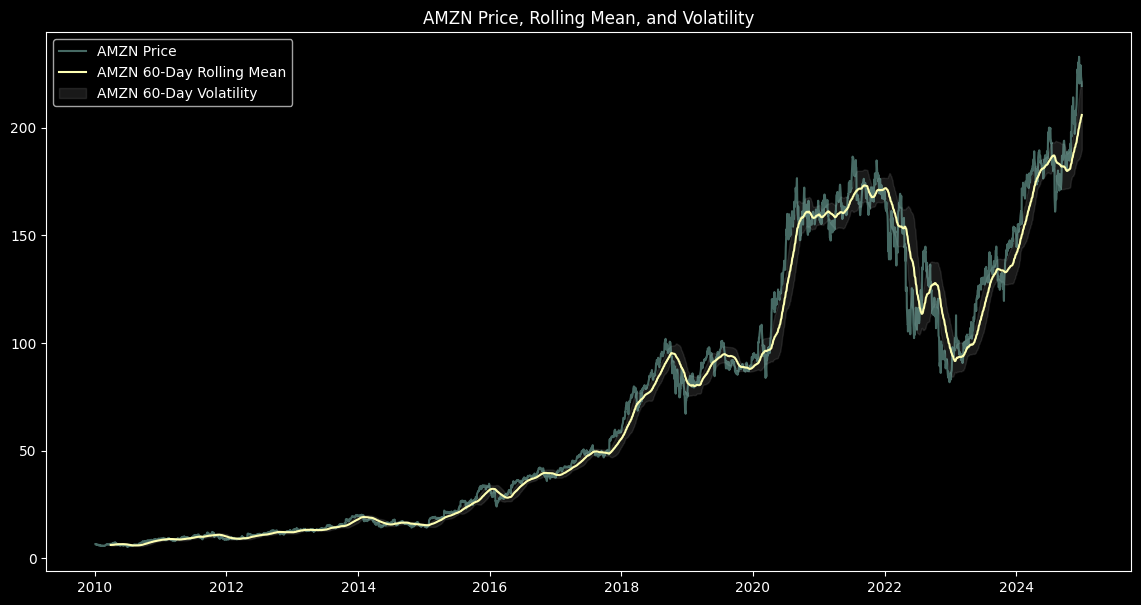

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()


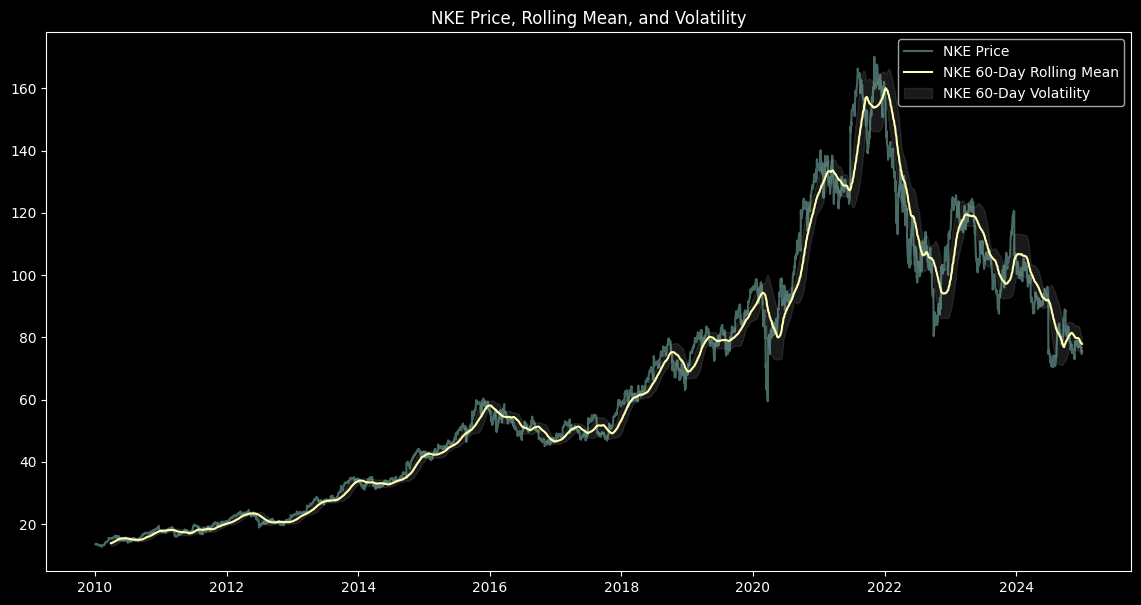

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()


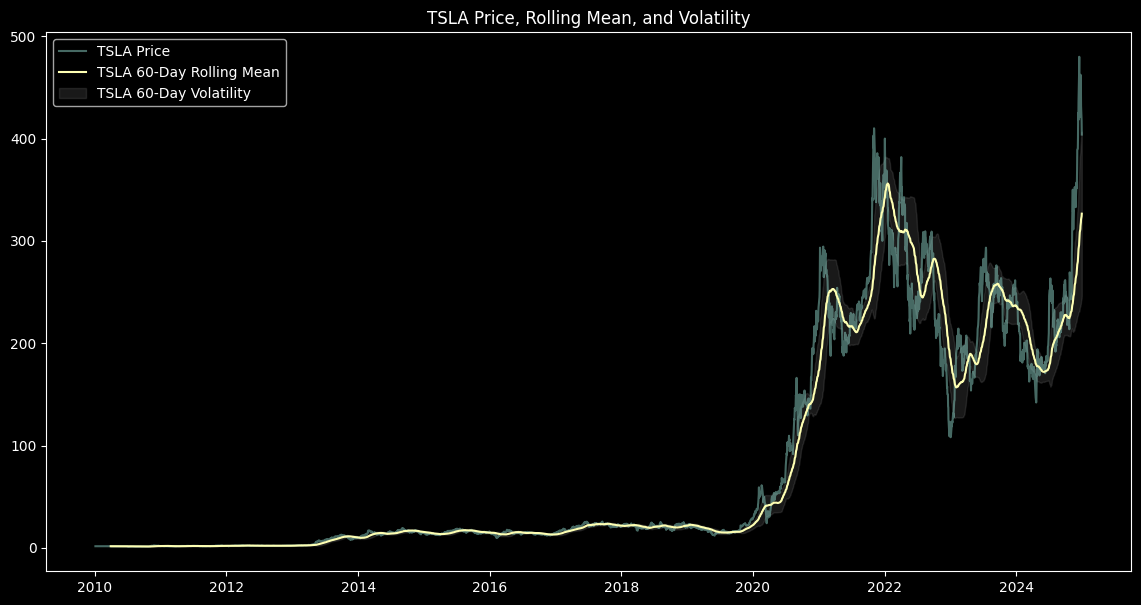

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()


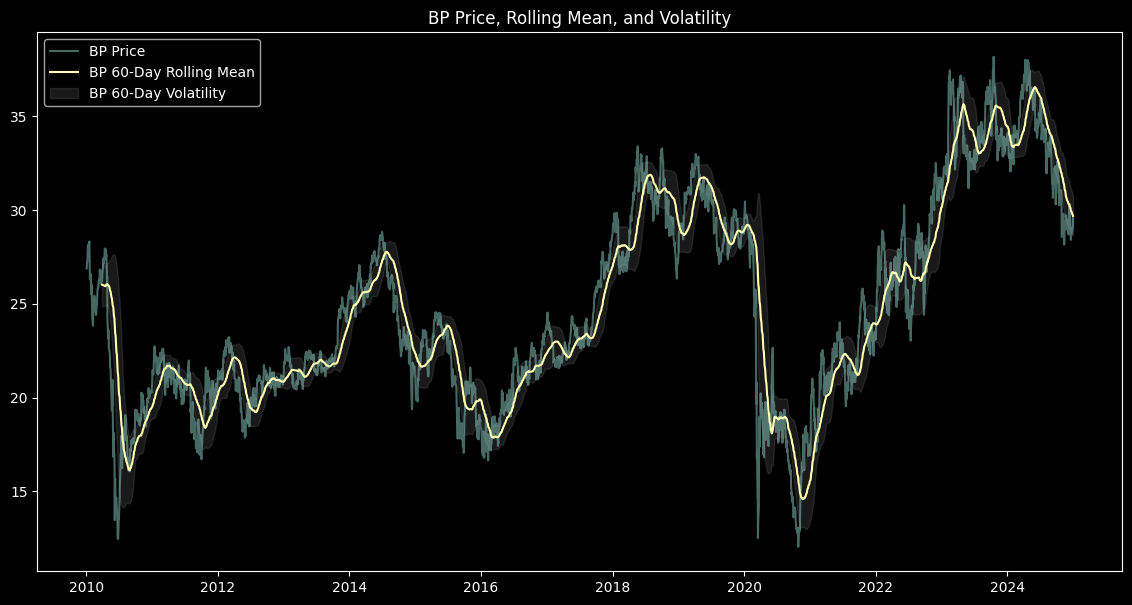

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()


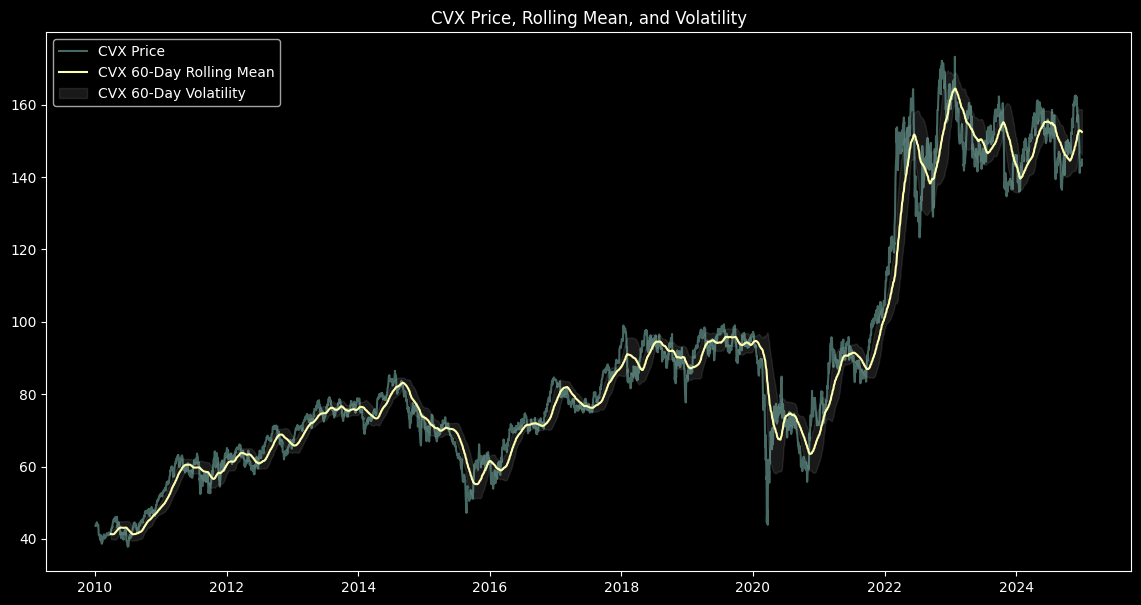

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/1725486270.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()


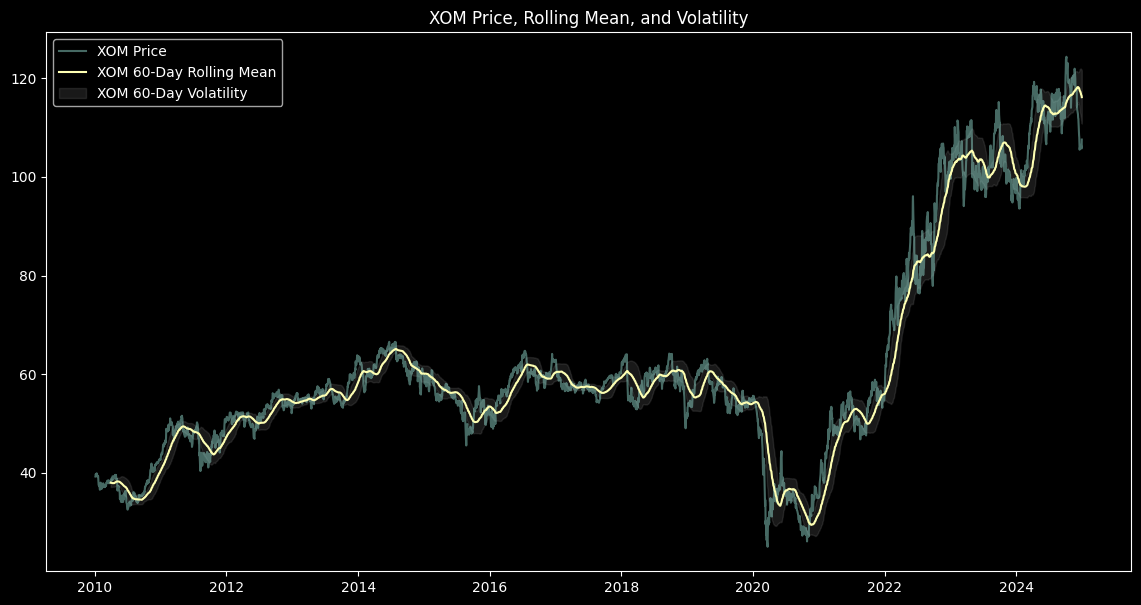

In [52]:
# --- 3. Rolling Statistics (Rolling Mean and Volatility) ---
for stock in stocks:
    stock_data[f'{stock}_Rolling_Mean'] = stock_data[stock].rolling(window=60).mean()
    stock_data[f'{stock}_Rolling_Volatility'] = stock_data[stock].rolling(window=60).std()

    # Plot Rolling Mean and Volatility
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data.index, stock_data[stock], label=f'{stock} Price', alpha=0.5)
    plt.plot(stock_data.index, stock_data[f'{stock}_Rolling_Mean'], label=f'{stock} 60-Day Rolling Mean')
    plt.fill_between(stock_data.index,
                     stock_data[f'{stock}_Rolling_Mean'] - stock_data[f'{stock}_Rolling_Volatility'],
                     stock_data[f'{stock}_Rolling_Mean'] + stock_data[f'{stock}_Rolling_Volatility'],
                     color='gray', alpha=0.2, label=f'{stock} 60-Day Volatility')
    plt.title(f'{stock} Price, Rolling Mean, and Volatility')
    plt.legend()
    plt.show()

In [53]:
# --- 4. Outlier Detection Using Z-Score ---
for stock in stocks:
    outliers = stock_data[abs(stock_data[f'{stock}_Z_Score']) > 3]
    if not outliers.empty:
        print(f"Outliers detected for {stock}:")
        print(outliers[[stock, f'{stock}_Z_Score']])

Outliers detected for GS:
                    GS  GS_Z_Score
2024-10-16  527.247986    3.050309
2024-10-17  526.392212    3.042213
2024-10-18  525.894714    3.037507
2024-11-05  524.362305    3.023010
2024-11-06  593.042053    3.672731
2024-11-07  579.300110    3.542730
2024-11-08  586.355164    3.609472
2024-11-11  599.370728    3.732601
2024-11-12  589.668823    3.640819
2024-11-13  591.290710    3.656163
2024-11-14  585.708374    3.603353
2024-11-15  590.614075    3.649762
2024-11-18  585.091431    3.597517
2024-11-19  578.514038    3.535293
2024-11-20  579.061279    3.540470
2024-11-21  593.171387    3.673954
2024-11-22  599.808594    3.736743
2024-11-25  600.057312    3.739096
2024-11-26  602.515137    3.762347
2024-11-27  602.445435    3.761688
2024-11-29  605.570007    3.791247
2024-12-02  601.710022    3.754731
2024-12-03  602.080017    3.758231
2024-12-04  598.710022    3.726350
2024-12-05  596.799988    3.708281
2024-12-06  599.679993    3.735527
2024-12-09  594.119995    3.6

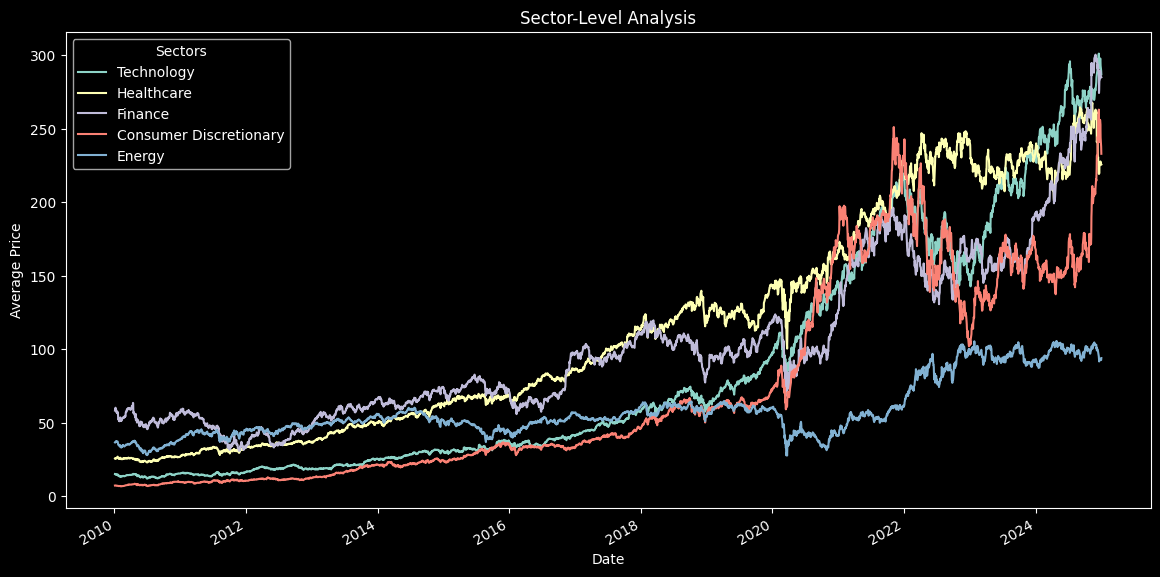

In [54]:
# --- 5. Sector-Level Analysis ---

sector_data = {}
for sector, sector_stocks in portfolio.items():
    sector_data[sector] = stock_data[sector_stocks].mean(axis=1)

sector_df = pd.DataFrame(sector_data)
sector_df.plot(figsize=(14, 7), title="Sector-Level Analysis")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.legend(title="Sectors")
plt.show()

1. Technology sector shows the most significant upward trend over time, indicating strong growth potential but also higher volatility during market downturns (e.g., during 2020 COVID-19 crash).

2. Healthcare sector exhibits steady and less volatile growth, suggesting it may act as a defensive sector in times of market uncertainty.

3. Finance sector shows moderate growth but tends to follow the overall market trend more closely, indicating sensitivity to macroeconomic conditions.

4. Consumer Discretionary sector experienced rapid growth, but also faced sharp declines during economic downturns, reflecting its cyclical nature.

5. Energy sector has been highly volatile, showing significant spikes and drops, likely influenced by oil price shocks and geopolitical events.

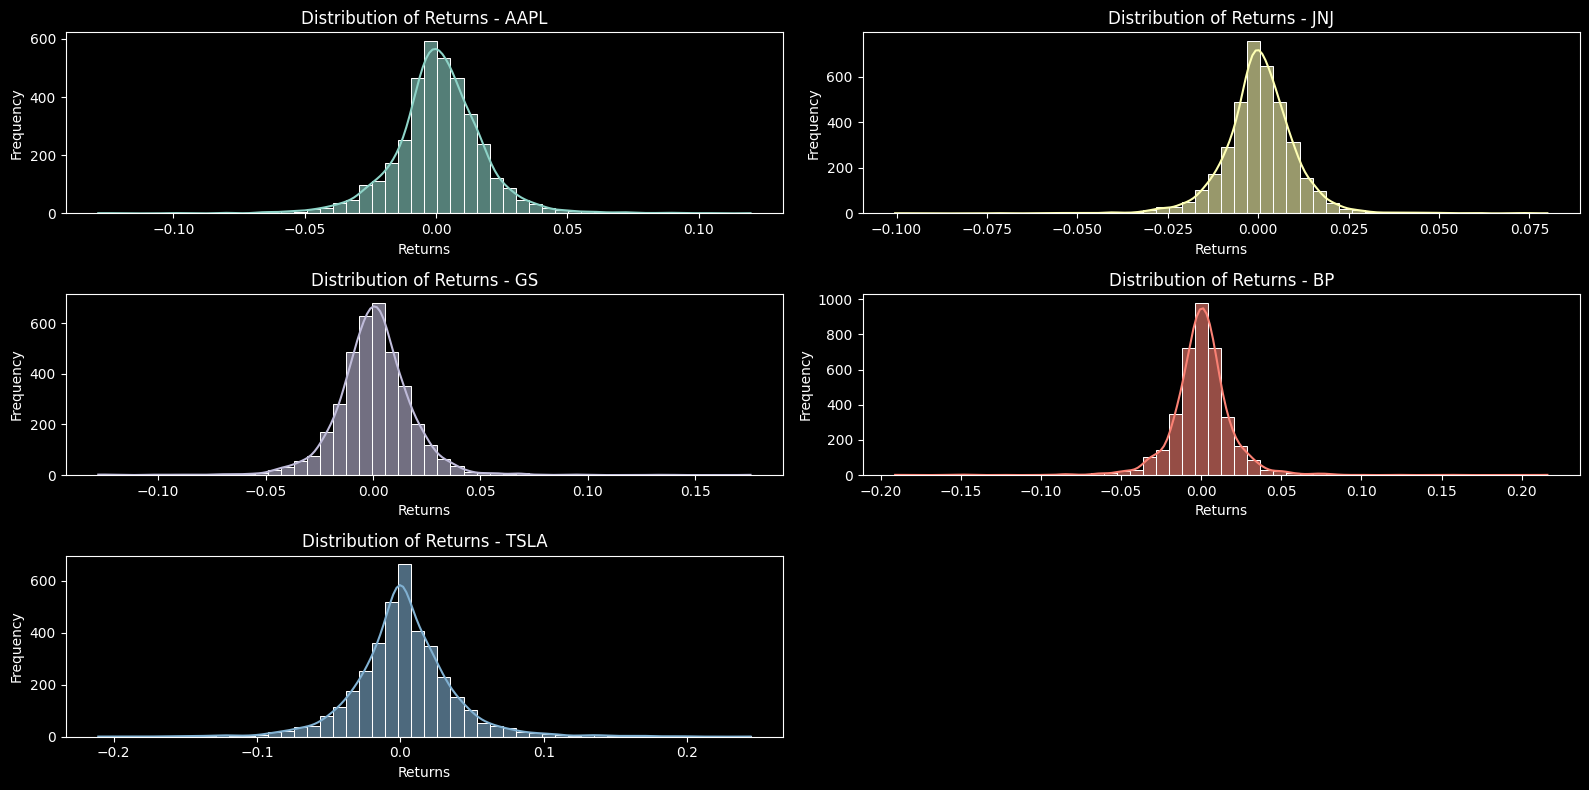

In [59]:
# --- 6. Distribution of Stock Returns ---

# --- Select specific stocks from different Sectors ---
selected_stocks = ['AAPL', 'JNJ', 'GS', 'BP', 'TSLA']

# --- Calculate percentage change (returns) ---
returns = stock_data[selected_stocks].pct_change().dropna()

# --- Plot the distribution of stock returns ---
plt.figure(figsize=(16, 8))

for i, stock in enumerate(selected_stocks):
    plt.subplot(3, 2, i + 1)  # 3 rows, 2 columns
    sns.histplot(returns[stock], kde=True, bins=50, alpha=0.6, color=f"C{i}")
    plt.title(f"Distribution of Returns - {stock}")
    plt.xlabel("Returns")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



 - High-risk, high-reward stocks: TSLA, AAPL — suitable for aggressive portfolios aiming for growth.
 - Stable, defensive stocks: JNJ, GS, BP — suitable for risk-averse portfolios looking for steady returns.
 - Sector-level diversification helps balance risk: By combining volatile stocks like TSLA with stable stocks like JNJ, the portfolio can achieve risk-adjusted returns.

In [87]:
stock_data.columns

Index(['AAPL', 'GOOGL', 'MSFT', 'JNJ', 'PFE', 'UNH', 'BAC', 'GS', 'JPM',
       'AMZN',
       ...
       'NKE_Rolling_Mean', 'NKE_Rolling_Volatility', 'TSLA_Rolling_Mean',
       'TSLA_Rolling_Volatility', 'BP_Rolling_Mean', 'BP_Rolling_Volatility',
       'CVX_Rolling_Mean', 'CVX_Rolling_Volatility', 'XOM_Rolling_Mean',
       'XOM_Rolling_Volatility'],
      dtype='object', length=259)

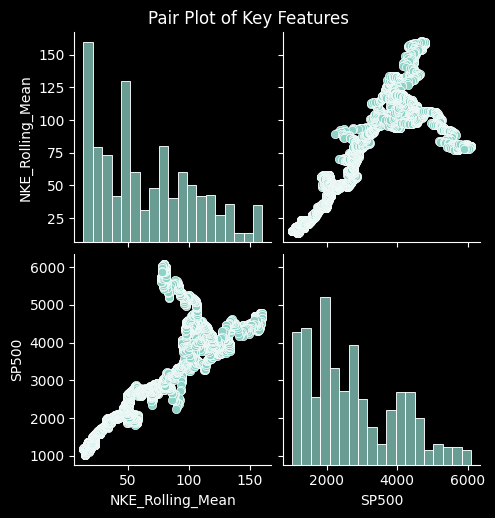

In [91]:
# --- 7. Pair Plot (Scatter Matrix) ---

pairplot_data = stock_data[['NKE_Rolling_Mean'] + ['SP500']]
sns.pairplot(pairplot_data)
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()

1. Strong Positive Correlation:

 - The scatter plot shows a clear positive correlation between Nike's rolling mean and the S&P 500 index, indicating that Nike's performance closely follows the overall market trend.
 - This suggests that Nike's stock is highly sensitive to broader market movements, making it a cyclical stock that performs well during market upswings.

2. Normal Distribution of Both Features:

 - The histograms along the diagonal show that both NKE_Rolling_Mean and SP500 have distributions that are roughly normal, with some skewness due to market events.
 - This is typical for financial time series data.

3. Clustered Relationship:

 - The scatter plot shows clusters of points that likely correspond to different market regimes (e.g., bull vs. bear markets).
 - For example, during periods of high market growth, Nike's rolling mean shows a significant increase in value, whereas during market downturns, the correlation weakens slightly.

**Nike's performance is tied to overall market performance:** This suggests that Nike is a good candidate for tactical asset allocation strategies that aim to adjust exposure based on market conditions.

**Diversification can reduce risk:** Since Nike is highly correlated with the S&P 500, combining it with low-correlation assets can help reduce portfolio risk

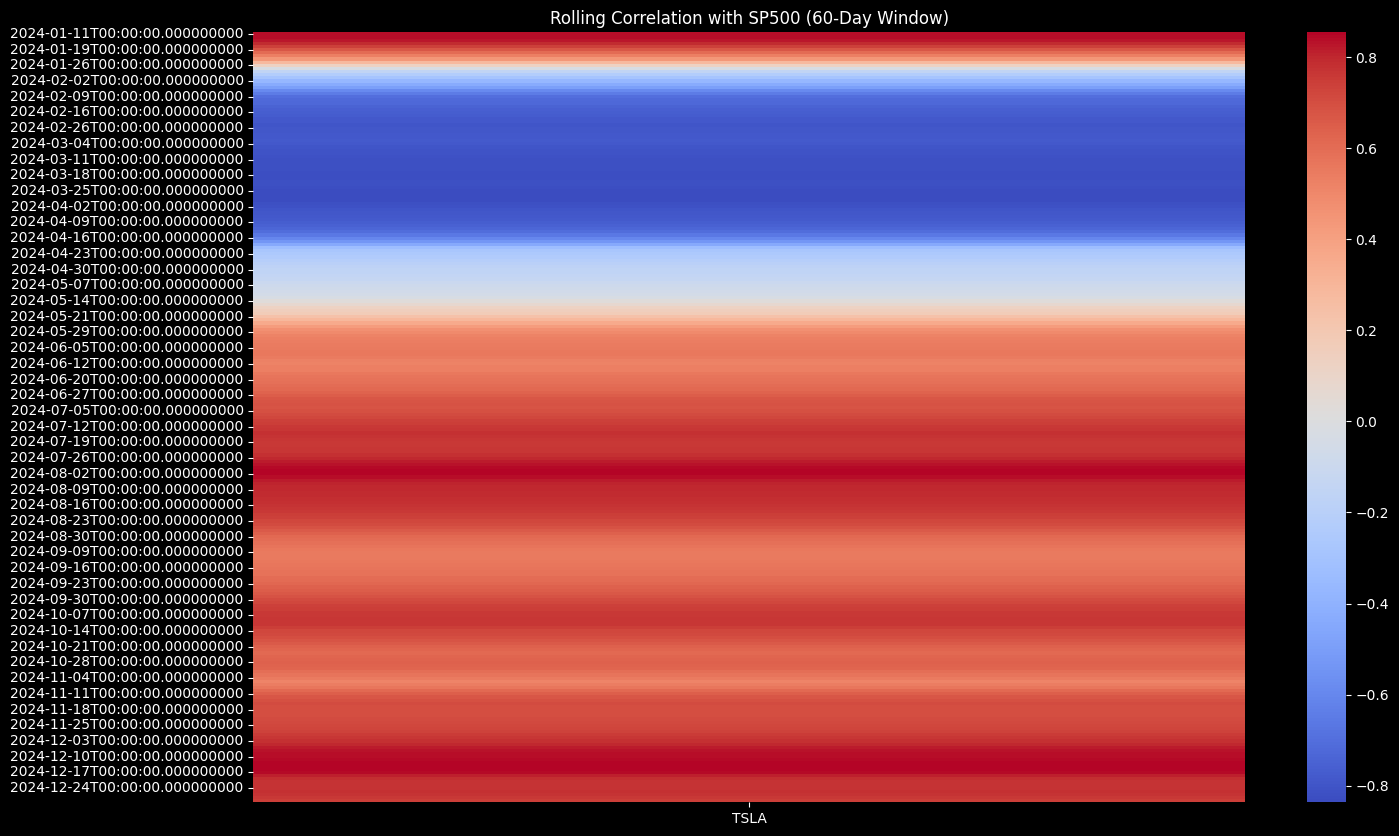

In [97]:
# --- 8. Rolling Correlation Heatmap ---
# Calculate rolling correlations
rolling_corr = stock_data[['TSLA']].rolling(window=60).corr(stock_data['SP500']).dropna()
plt.figure(figsize=(16, 10))
sns.heatmap(rolling_corr.tail(len(rolling_corr.index) // len(stocks)), cmap="coolwarm", annot=False)
plt.title("Rolling Correlation with SP500 (60-Day Window)")
plt.show()

1. Fluctuating Correlation Over Time:

 - The heatmap shows significant variation in correlation over time. Some periods display strong positive correlation (red areas), while others show negative correlation (blue areas).
 - This indicates that Tesla’s stock performance is highly sensitive to market conditions but doesn’t always move in sync with the S&P 500.

2. Periods of Negative Correlation:

 - Notice the blue areas, where the correlation dips into negative territory. This could be due to Tesla-specific events, such as product launches, regulatory announcements, or earnings reports that decouple its performance from the broader market.
 - During these periods, Tesla may serve as a diversifying asset within a portfolio.

3. Higher Correlation in 2024:

 - The heatmap suggests a period of higher correlation in the second half of 2024, potentially indicating that Tesla’s performance aligns more closely with the overall market during that time.

**Dynamic Correlation:** The changing correlation suggests that Tesla can act as both a market-tracking asset and a diversifying asset, depending on the market regime.

**Event-Driven Stock:** Tesla’s correlation changes are likely driven by company-specific events. This highlights the importance of tracking news and sentiment data to understand Tesla’s behavior relative to the broader market.

**Useful for Tactical Asset Allocation:** The heatmap shows that rolling correlation analysis can help adjust portfolio weights dynamically based on Tesla's relationship with the market.

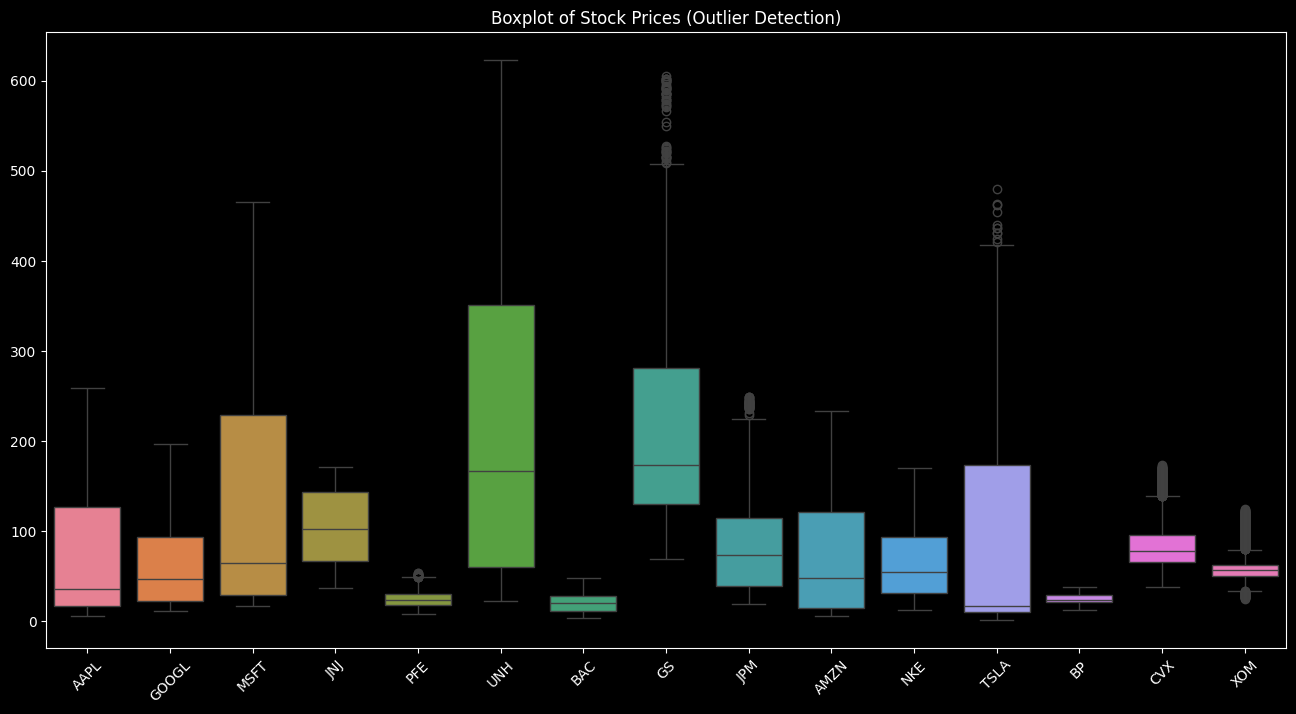

In [101]:
# --- 9. Boxplots for Outlier Detection ---
plt.figure(figsize=(16, 8))
sns.boxplot(data=stock_data[stocks])
plt.title("Boxplot of Stock Prices (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

1. Outliers Detected in Multiple Stocks:
 - The boxplot highlights outliers (shown as circles) for several stocks, particularly for Tesla (TSLA), CVX, and XOM.
 - These outliers represent extreme price movements that could be attributed to market events, earnings reports, or geopolitical factors.

2. Stocks with High Price Volatility:
 - UnitedHealth Group (UNH) and Tesla (TSLA) have wide interquartile ranges (IQRs), indicating high price volatility.
 - These stocks are more likely to experience large price swings, making them suitable for high-risk, high-reward strategies.

3. Stable Stocks with Fewer Outliers:
 - Pfizer (PFE), Bank of America (BAC), and Johnson & Johnson (JNJ) show narrow IQRs and fewer outliers, indicating that these stocks are more stable and have lower volatility.
 - These stocks are ideal for defensive portfolio strategies.

4. Tech Stocks Show Mixed Behavior:
 - Apple (AAPL) and Microsoft (MSFT) show moderate volatility with some outliers, indicating that while they are growth stocks, they also carry some risk.

**High-volatility stocks (e.g., TSLA, UNH) should be closely monitored and can be used for short-term tactical strategies.**

**Stable stocks (e.g., JNJ, PFE, BAC) provide consistent returns and act as anchors to balance portfolio risk.**

**The presence of outliers highlights the importance of risk management strategies such as stress testing and stop-loss mechanisms to mitigate downside risk.**

--------------------------------------------------------------------------------------------------------------------------------------------------

##### Behavior of individual assets and their potential for diversification when combined into a portfolio

1. Individual Asset Performance
 - See the performance of individual assets over time.
2. Rolling Returns
 - Identify which assets have higher/lower returns over different periods.
3. Volatility Comparison
 - Understand which assets have higher/lower risk over time.
4. Correlation Heatmap (Diversification Potential)
 - Assess which assets are highly correlated and which can diversify risk.

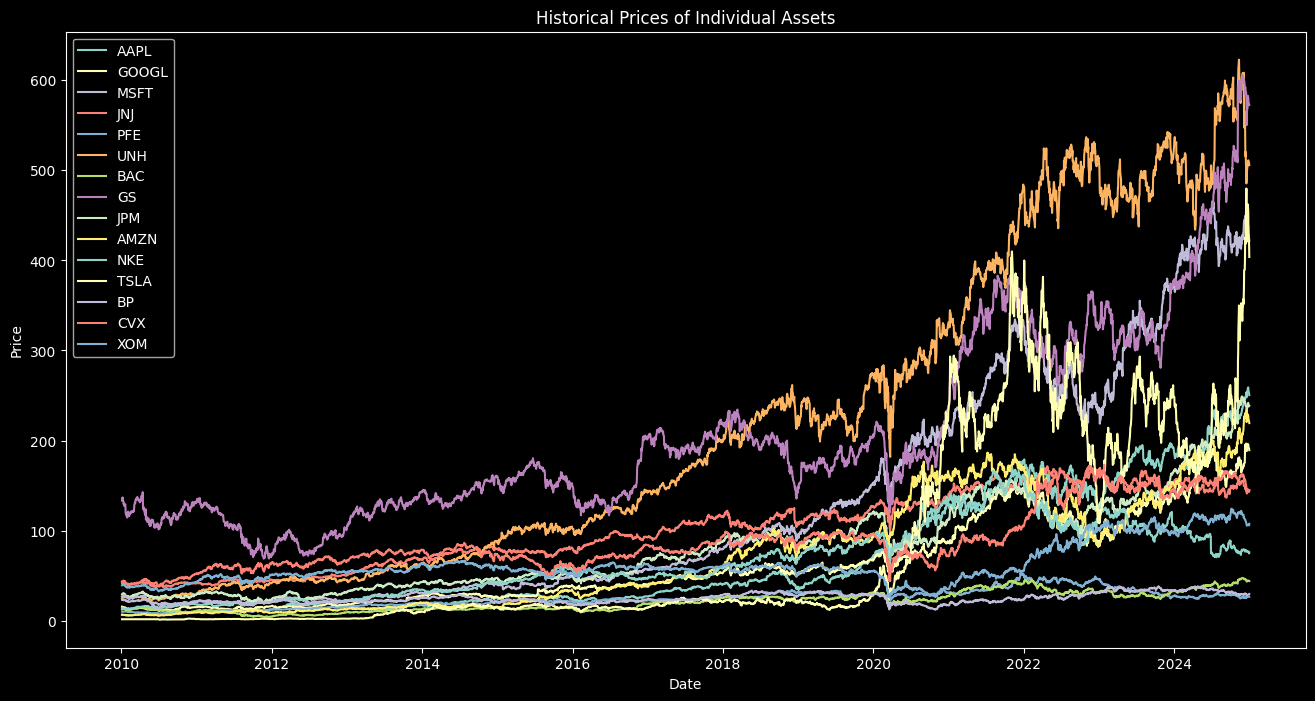

In [102]:
# --- 1. Individual Asset Performance ---
plt.figure(figsize=(16, 8))
for stock in stocks:
    plt.plot(stock_data.index, stock_data[stock], label=stock)
plt.title("Historical Prices of Individual Assets")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

1. Tesla (TSLA) and Amazon (AMZN) Show Exponential Growth:
 - TSLA and AMZN stand out with significant price appreciation over the years, indicating that growth stocks have delivered high returns.
 - However, both also show sharp declines during market downturns, indicating high volatility and sensitivity to market conditions.

2. Steady Growth in Healthcare and Finance Stocks:
 - Johnson & Johnson (JNJ) and Goldman Sachs (GS) show steady and consistent growth, making them ideal for risk-averse portfolios.
 - These stocks tend to act as defensive assets during market crashes.

3. Energy Stocks Are Volatile but Show Resurgence:
 - ExxonMobil (XOM) and Chevron (CVX) show high volatility, especially during periods of oil price fluctuations.
 - However, they exhibit recovery trends during 2023-2024, reflecting cyclical patterns based on global energy demand.

4. Market Crashes and Recoveries Are Visible:
 - The COVID-19 crash in early 2020 is evident as a sharp drop across all stocks.
 - Post-crash recovery patterns differ, with tech stocks recovering faster than energy and finance stocks.

**Diversification Across Sectors Helps Reduce Risk:** The chart highlights the importance of diversifying across sectors to reduce portfolio volatility and protect against sector-specific risks.

**Growth vs. Defensive Stocks:**
Tech stocks (TSLA, AMZN) offer high growth potential but come with high risk.
Healthcare and finance stocks (JNJ, GS) offer stability and act as anchors in a portfolio.


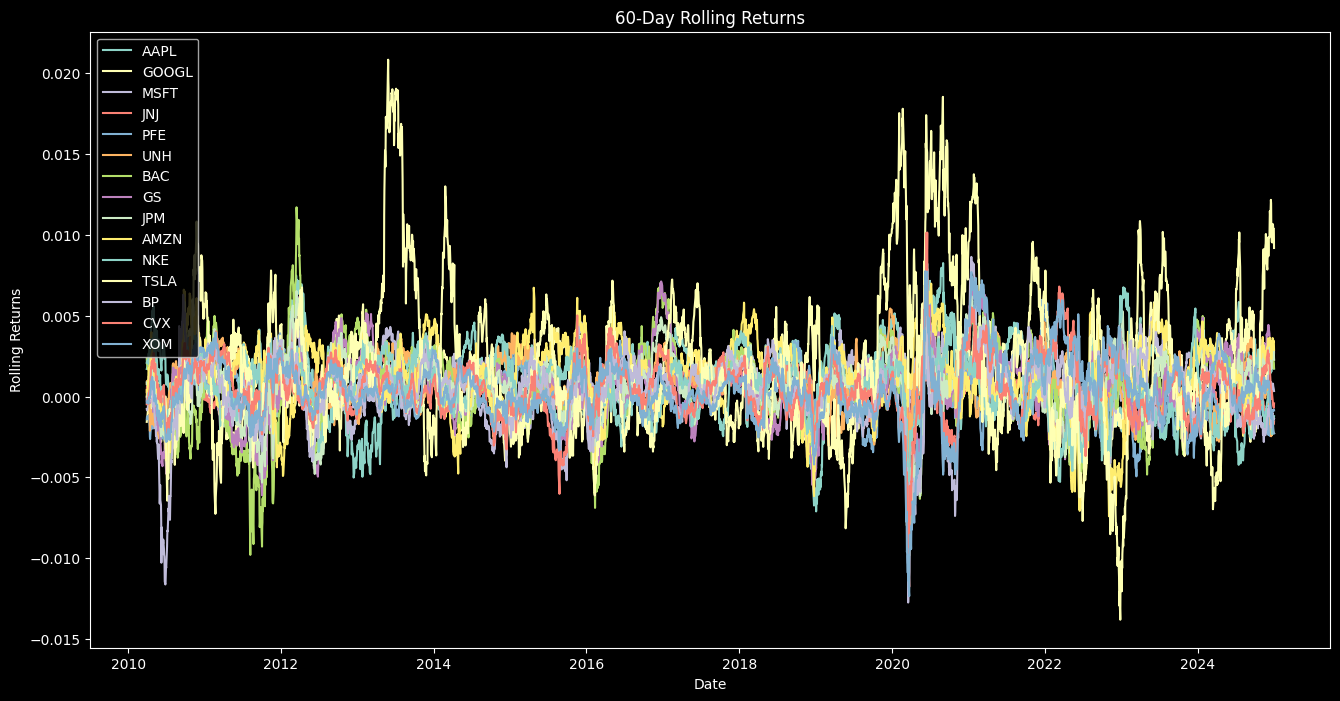

In [103]:
# --- 2. Rolling Returns ---
rolling_window = 60  # 60-day rolling returns
plt.figure(figsize=(16, 8))
for stock in stocks:
    rolling_returns = stock_data[stock].pct_change().rolling(window=rolling_window).mean()
    plt.plot(stock_data.index, rolling_returns, label=stock)
plt.title(f"{rolling_window}-Day Rolling Returns")
plt.xlabel("Date")
plt.ylabel("Rolling Returns")
plt.legend()
plt.show()

1. Increased Volatility in Recent Years:
 - The chart shows higher fluctuations in rolling returns starting from 2020, especially around the COVID-19 crash and subsequent market recovery.
 - This indicates that recent years have been more volatile, with stocks experiencing larger swings in returns over shorter periods.

2. Tech Stocks Show the Most Fluctuation:
 - Amazon (AMZN) and Tesla (TSLA) show frequent spikes in rolling returns, indicating that these stocks are highly sensitive to market conditions and external events.
 - These fluctuations make tech stocks suitable for growth-focused strategies but highlight the need for risk management.

3. Defensive Stocks Are More Stable:
 - Healthcare stocks like Johnson & Johnson (JNJ) and Pfizer (PFE) exhibit less variation in rolling returns, indicating that these stocks are more stable and less reactive to market swings.
 - This makes them ideal for defensive portfolio allocations.

4. Rolling Returns Capture Market Cycles:
 - The peaks and troughs in rolling returns reflect market cycles, including bull markets, bear markets, and periods of recovery.
 - The chart shows how different stocks react differently to these cycles, which is essential for tactical asset allocation.

Tech stocks (e.g., TSLA, AMZN) show higher short-term returns, which can be profitable for active trading strategies, but they also carry higher risk.

Defensive stocks (e.g., JNJ, PFE) provide steady returns and act as buffers during market downturns.

The rolling returns analysis helps in identifying market trends and adjusting portfolio weights dynamically based on short-term performance.


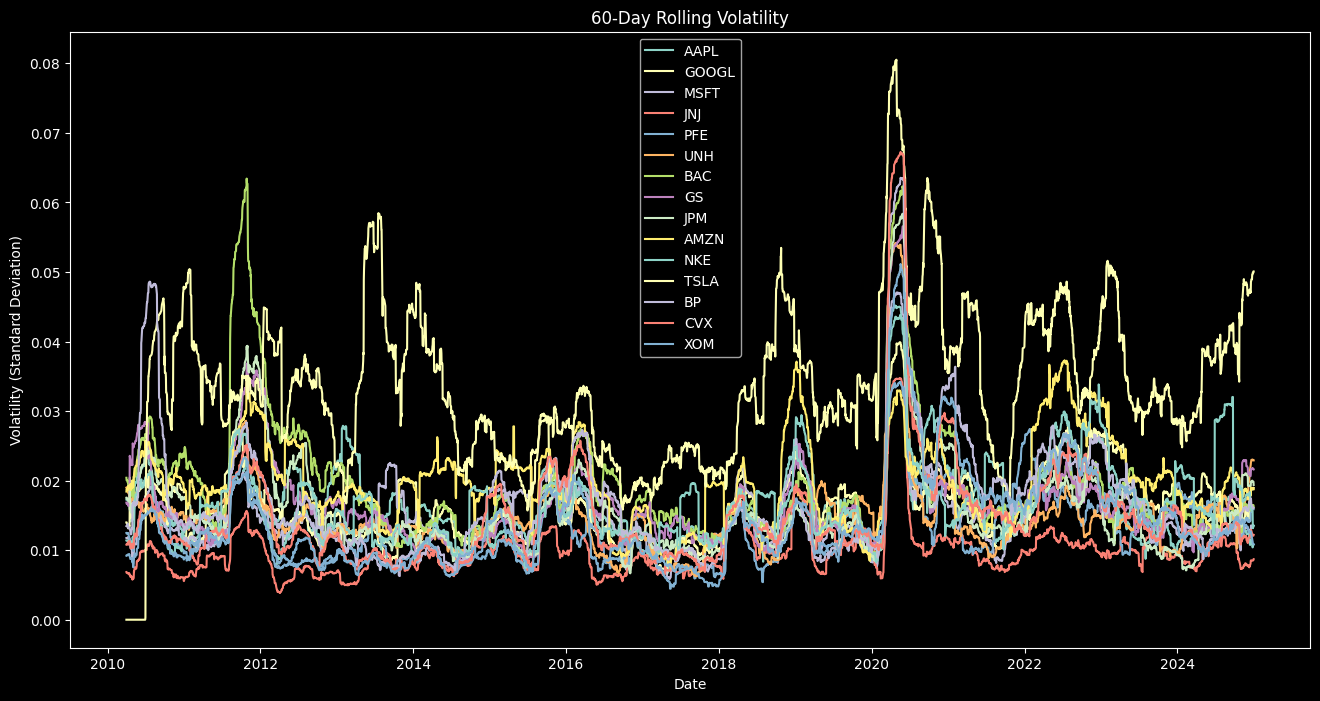

In [104]:
# --- 3. Rolling Volatility Comparison ---
plt.figure(figsize=(16, 8))
for stock in stocks:
    rolling_volatility = stock_data[stock].pct_change().rolling(window=rolling_window).std()
    plt.plot(stock_data.index, rolling_volatility, label=stock)
plt.title(f"{rolling_window}-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation)")
plt.legend()
plt.show()

1. Higher Volatility During Market Crises:
 - The chart shows spikes in volatility during major market crises, such as the COVID-19 crash in early 2020 and oil price shocks.
 - These spikes indicate that during times of market uncertainty, stocks become more volatile, which increases portfolio risk.

2. Tech Stocks Show the Highest Volatility:
 - Amazon (AMZN) and Tesla (TSLA) show consistent spikes in volatility, indicating that tech stocks carry more risk compared to other sectors.
 - This makes them high-reward but high-risk components of the portfolio.

3. Healthcare and Finance Stocks Are More Stable:
 - Johnson & Johnson (JNJ) and Goldman Sachs (GS) have relatively lower volatility, indicating that healthcare and finance sectors are more stable and less sensitive to market shocks.

4. Volatility Has Declined in Recent Years:
 - Post-pandemic, the volatility levels across most stocks seem to have normalized compared to the initial spike during 2020.
 - This suggests a calming market environment, but with potential short-term spikes due to macroeconomic events.

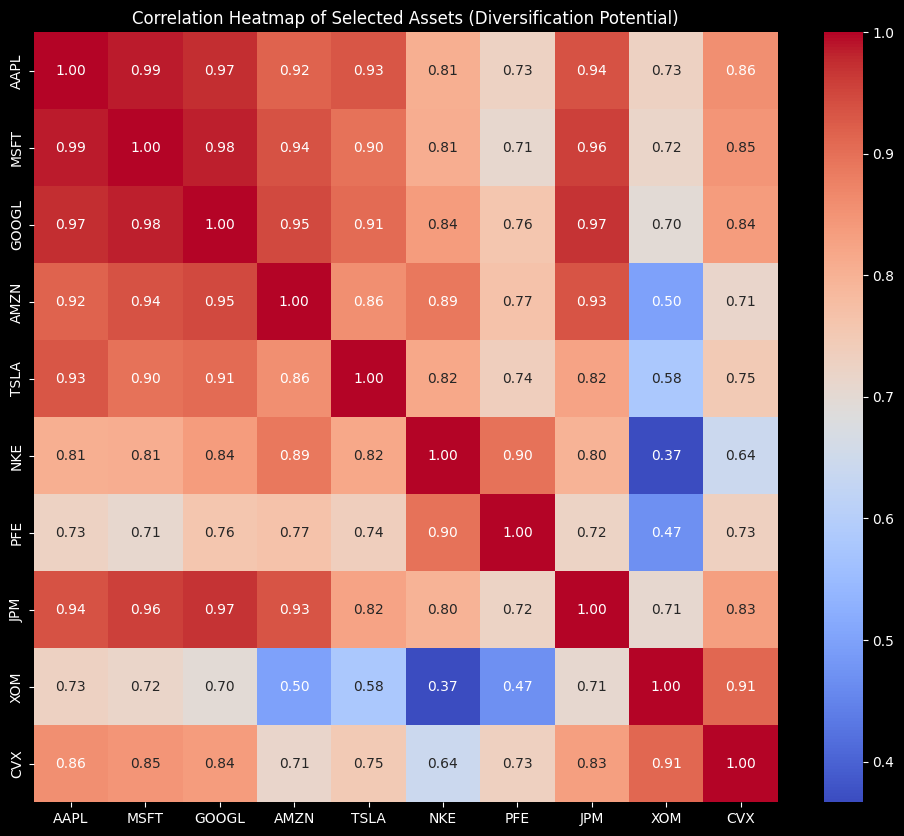

In [105]:
# --- 4. Correlation Heatmap (Diversification Potential) ---
# Calculate correlation matrix for selected stocks
selected_stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NKE', 'PFE', 'JPM', 'XOM', 'CVX']
correlation_matrix = stock_data[selected_stocks].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Selected Assets (Diversification Potential)")
plt.show()

1. Assets with low correlations are better for diversification.
2. High volatility assets (like TSLA) may add risk to the portfolio but also have high return potential.
3. Rolling returns give insights into how asset performances change over time, which is important for portfolio adjustments.

### 🚀 Efficient Frontier Visualization: Finding Optimal Portfolios

The Efficient Frontier is a key concept in Modern Portfolio Theory. It shows the optimal portfolios that provide the highest return for a given level of risk. It’s a great way to visualize diversification potential and identify the best risk-return combinations.

we'll:

1. Generate random portfolios with different weights assigned to each asset.
2. Calculate the expected return and risk (volatility) for each portfolio.
3. Plot the Efficient Frontier, highlighting the optimal portfolio with the maximum Sharpe Ratio.

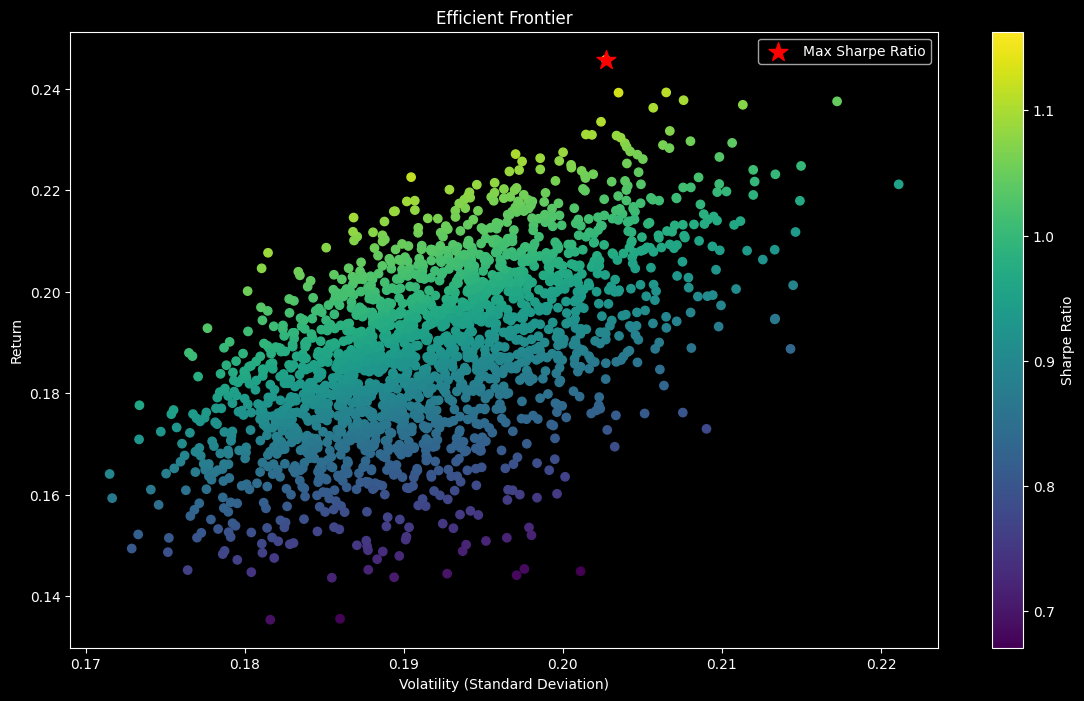

Optimal Portfolio Weights:
         Weight
AAPL   0.103190
GOOGL  0.070619
MSFT   0.059678
JNJ    0.126685
PFE    0.042385
UNH    0.099010
BAC    0.020304
GS     0.035591
JPM    0.061681
AMZN   0.113870
NKE    0.046134
TSLA   0.159942
BP     0.009703
CVX    0.048182
XOM    0.003027


In [108]:
# --- 1. Define Risk-Free Rate ---
risk_free_rate = 0.01  # 1% annual risk-free rate

# --- 2. Calculate Returns and Covariance ---
returns = stock_data[stocks].pct_change().mean() * 252  # Annualized returns
cov_matrix = stock_data[stocks].pct_change().cov() * 252  # Annualized covariance

# --- 3. Generate Random Portfolios ---
num_portfolios = 2000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    # Random weights
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    # Portfolio return
    portfolio_return = np.dot(weights, returns)
    
    # Portfolio volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Sharpe Ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    
    # Store results
    results[0, i] = portfolio_volatility
    results[1, i] = portfolio_return
    results[2, i] = sharpe_ratio
    weights_record.append(weights)

# --- 4. Find the Optimal Portfolio ---
max_sharpe_idx = results[2].argmax()  # Index of max Sharpe Ratio
max_sharpe_volatility, max_sharpe_return = results[0, max_sharpe_idx], results[1, max_sharpe_idx]
optimal_weights = weights_record[max_sharpe_idx]

# --- 5. Plot the Efficient Frontier ---
plt.figure(figsize=(14, 8))
plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='red', marker='*', s=200, label='Max Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.show()

# --- 6. Display Optimal Portfolio Weights ---
optimal_portfolio = pd.DataFrame(optimal_weights, index=stocks, columns=['Weight'])
print("Optimal Portfolio Weights:")
print(optimal_portfolio)

1. Efficient Frontier Shape:
 - The curve of the efficient frontier shows that as risk (volatility) increases, the expected return also increases, but at a diminishing rate.
 - Portfolios on the efficient frontier represent the optimal balance between risk and return. Any portfolio below the curve is considered suboptimal, as it has lower returns for the same level of risk.

2. Max Sharpe Ratio Portfolio:
 - The red star marks the portfolio with the maximum Sharpe Ratio, representing the best risk-adjusted return.
 - This portfolio achieves the highest return per unit of risk, making it an ideal candidate for investors looking to maximize returns without excessive risk.

3. Trade-Off Between Risk and Return:
 - The bottom-left portfolios have low risk but also lower returns, while the top-right portfolios offer higher returns but come with greater risk.
 - Depending on the investor's risk tolerance, a midpoint portfolio along the curve might be preferable for balanced risk-return objectives.

4. Diversification Effect:
 - The efficient frontier showcases the power of diversification. By combining assets with different risk and return characteristics, the portfolio achieves higher returns for lower volatility compared to individual assets.

The Max Sharpe Ratio portfolio is ideal for investors seeking maximum risk-adjusted returns.

Investors with lower risk tolerance can opt for portfolios on the lower-left side of the frontier, which offer lower volatility at the cost of slightly reduced returns.

The efficient frontier analysis can help adjust portfolio weights dynamically to maximize returns while managing risk.

#### Anomaly Detection

1. Plot Daily Returns – Identify extreme daily return values (both positive and negative).
2. Rolling Volatility Plot – Spot periods of high volatility in the portfolio.
3. Highlight Known Market Events – Annotate specific known market events on the plots (e.g., COVID-19 crash in March 2020).
4. Outlier Detection using Z-Score – Identify extreme outliers in stock returns using statistical methods.

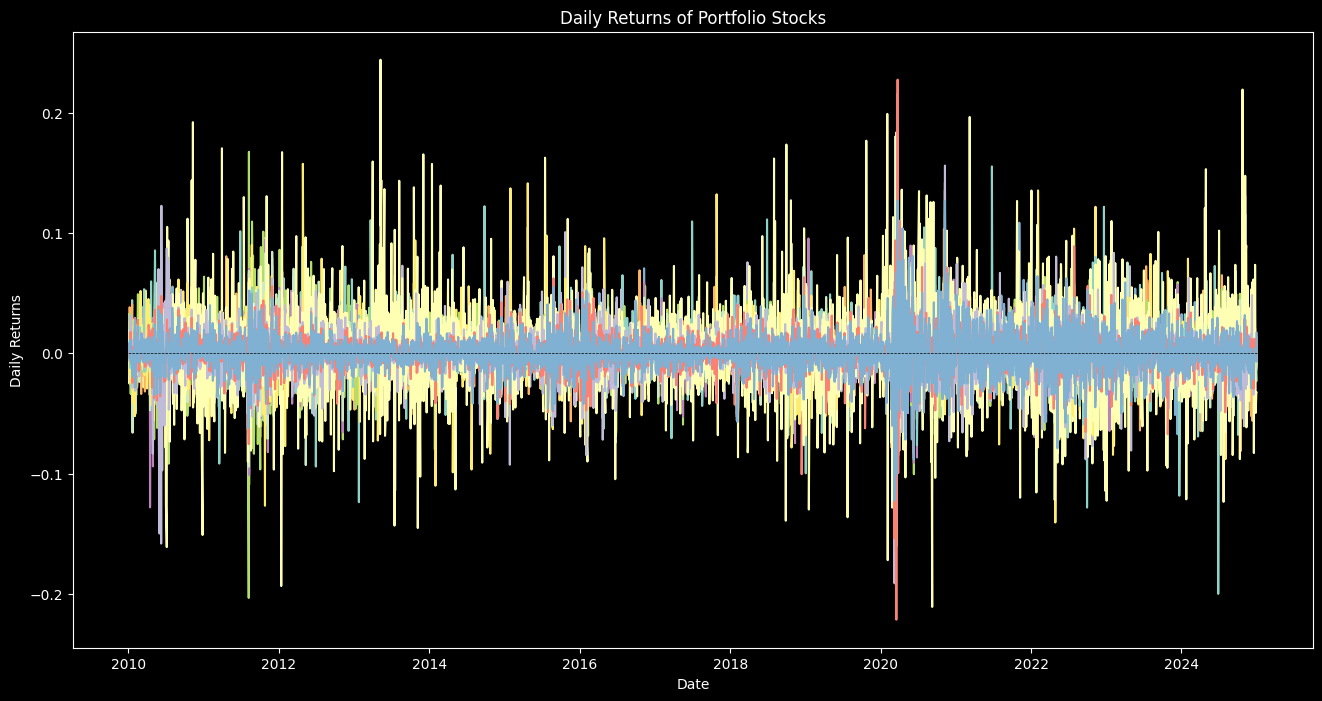

In [110]:
# --- 1. Daily Returns Plot ---
daily_returns = stock_data[stocks].pct_change().dropna()

plt.figure(figsize=(16, 8))
plt.plot(daily_returns.index, daily_returns)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.title("Daily Returns of Portfolio Stocks")
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.show()

 - High volatility periods require active risk management, such as rebalancing or adjusting portfolio exposure.

 - Diversification across sectors can help reduce overall portfolio risk by offsetting losses in one sector with gains in another.

 - Understanding daily return behavior can help develop tactical strategies to limit downside risk during periods of market turmoil.

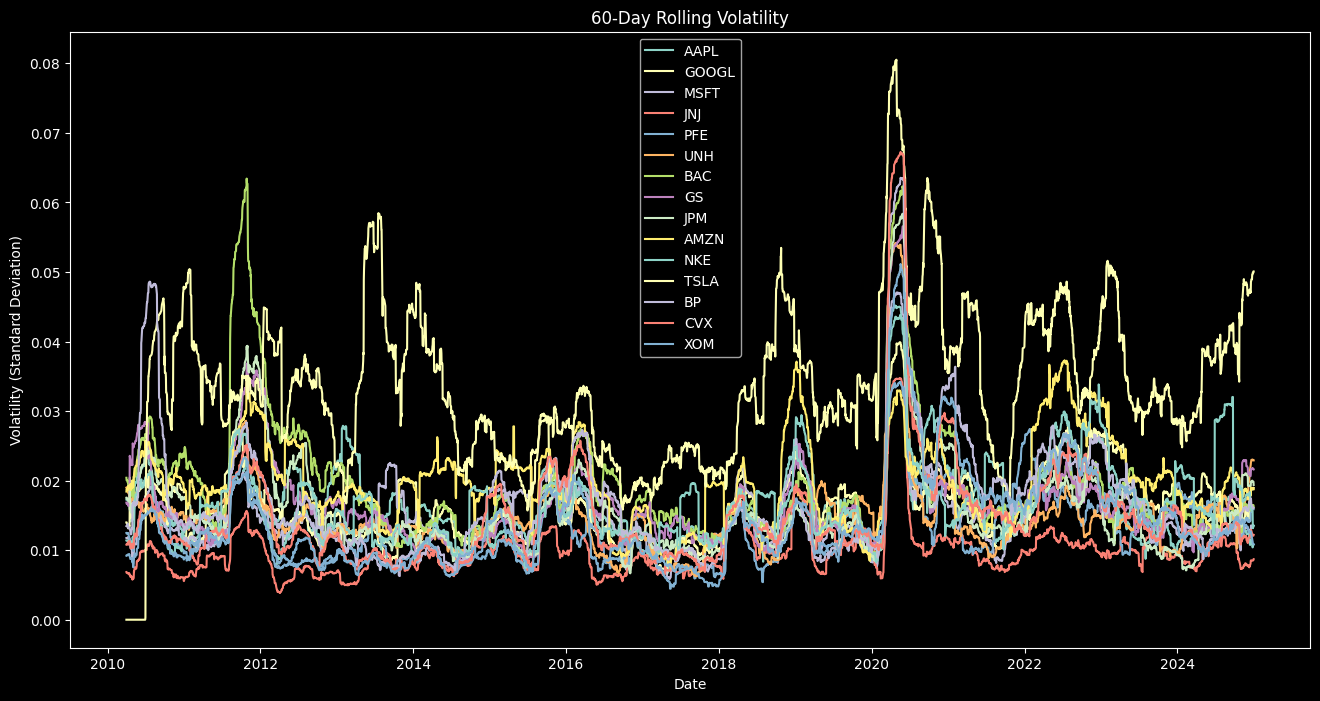

In [111]:
# --- 2. Rolling Volatility Plot (60-Day Window) ---
rolling_volatility = daily_returns.rolling(window=60).std()

plt.figure(figsize=(16, 8))
plt.plot(rolling_volatility.index, rolling_volatility)
plt.title("60-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation)")
plt.legend(stocks)
plt.show()

 - Higher volatility periods require proactive portfolio management to mitigate downside risks.

 - Diversifying across sectors helps in balancing the overall portfolio risk, as defensive sectors like healthcare and finance provide risk buffers against volatile tech stocks.

 - Monitoring rolling volatility trends can help adjust portfolio allocations dynamically to manage risk effectively.

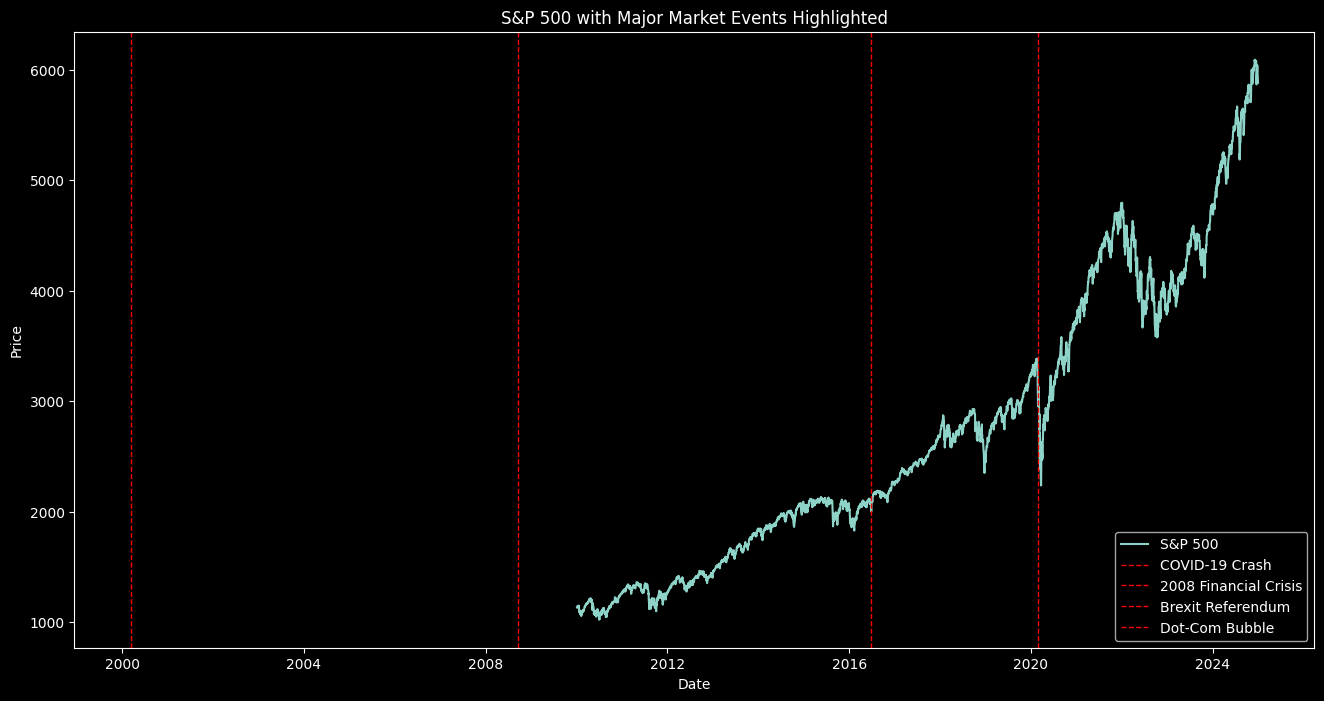

In [115]:
# --- 3. Highlight Known Market Events ---

from datetime import datetime

market_events = {
    "COVID-19 Crash": datetime(2020, 3, 1),
    "2008 Financial Crisis": datetime(2008, 9, 15),
    "Brexit Referendum": datetime(2016, 6, 24),
    "Dot-Com Bubble": datetime(2000, 3, 10),
}

plt.figure(figsize=(16, 8))
plt.plot(stock_data.index, stock_data["SP500"], label="S&P 500")
for event, date in market_events.items():
    plt.axvline(x=date, color='red', linestyle='--', linewidth=1, label=event)
plt.title("S&P 500 with Major Market Events Highlighted")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


1. Dot-Com Bubble (2000-2001):
 - The first red line marks the Dot-Com Bubble burst, where the S&P 500 experienced a significant decline after a period of rapid growth in tech stocks.
 - The market took several years to recover from the crash, with slow growth until the mid-2000s.

2. 2008 Financial Crisis:
 - The second red line highlights the 2008 Financial Crisis, which led to one of the largest declines in market history.
 - The S&P 500 plunged nearly 50% during this crisis, driven by the collapse of major financial institutions and a global credit freeze.

3. Brexit Referendum (2016):
 - The third red line shows the Brexit Referendum, where the United Kingdom voted to leave the European Union.
 - This event caused short-term volatility, but the market quickly recovered and continued to rise afterward.

4. COVID-19 Crash (2020):

 - The fourth red line marks the COVID-19 pandemic crash, one of the fastest market declines in history.
 - Despite the sharp drop, the market quickly rebounded due to unprecedented monetary stimulus and policy interventions.

In [113]:
# --- 4. Outlier Detection Using Z-Score ---

# Calculate Z-Score for daily returns
z_scores = daily_returns.apply(zscore)

# Identify outliers (Z-Score > 3 or < -3)
outliers = (z_scores > 3) | (z_scores < -3)
for stock in stocks:
    outlier_dates = daily_returns[outliers[stock]].index
    if len(outlier_dates) > 0:
        print(f"Outliers detected for {stock}:")
        print(outlier_dates)

Outliers detected for AAPL:
DatetimeIndex(['2010-04-21', '2010-05-10', '2011-08-08', '2011-08-09',
               '2011-10-19', '2012-01-25', '2012-04-25', '2012-05-21',
               '2012-11-19', '2012-12-05', '2013-01-24', '2013-04-17',
               '2013-09-11', '2014-01-28', '2014-04-24', '2015-01-28',
               '2015-08-11', '2015-08-21', '2015-08-26', '2016-01-27',
               '2016-04-27', '2016-07-27', '2017-02-01', '2018-08-01',
               '2018-11-02', '2018-12-26', '2019-01-03', '2019-01-30',
               '2019-05-13', '2019-08-05', '2020-02-27', '2020-03-02',
               '2020-03-09', '2020-03-10', '2020-03-12', '2020-03-13',
               '2020-03-16', '2020-03-20', '2020-03-24', '2020-04-01',
               '2020-04-06', '2020-07-31', '2020-09-03', '2020-09-08',
               '2020-10-12', '2020-10-30', '2021-03-01', '2022-01-28',
               '2022-05-05', '2022-05-11', '2022-05-18', '2022-09-13',
               '2022-10-28', '2022-11-10', '2024-

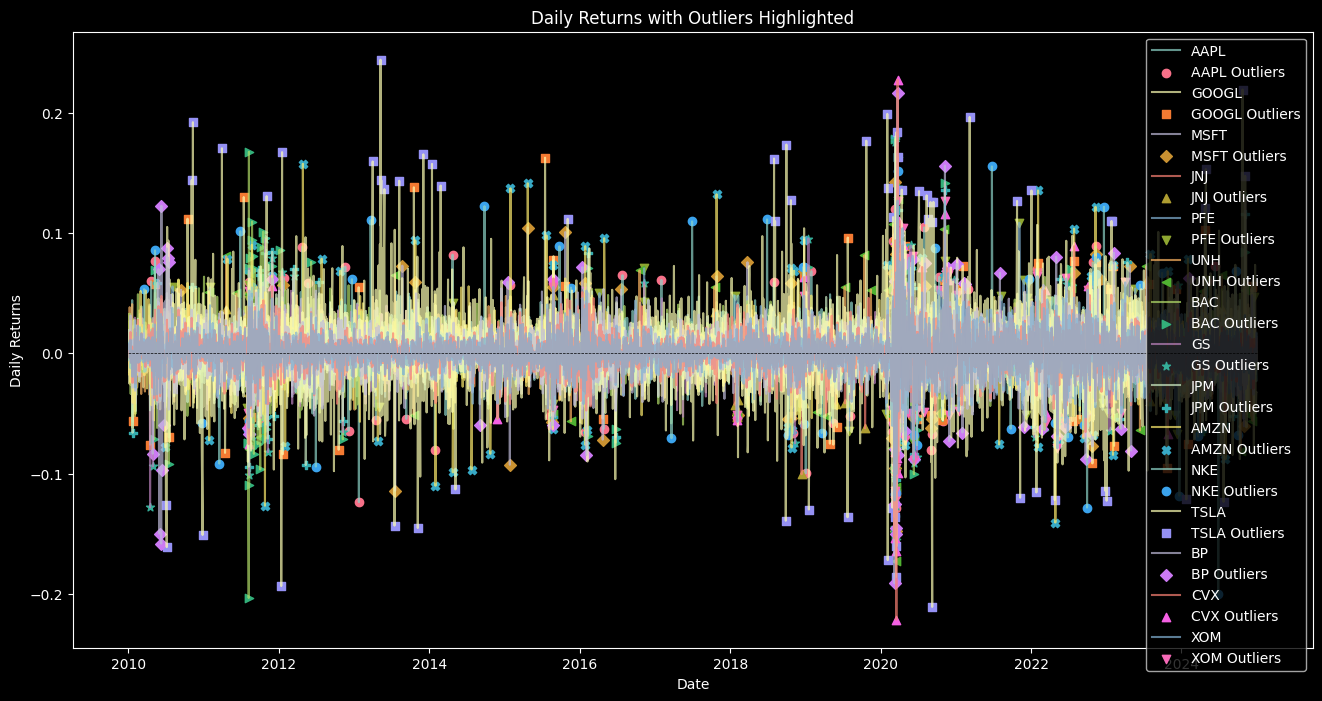

In [116]:
# --- 5. Visualize Outliers with Different Colors and Markers ---
plt.figure(figsize=(16, 8))

# Define a color palette and markers for different stocks
colors = sns.color_palette("husl", len(stocks))  # Using seaborn color palette
markers = ['o', 's', 'D', '^', 'v', '<', '>', '*', 'P', 'X']  # Different markers

for i, stock in enumerate(stocks):
    # Plot the daily returns
    plt.plot(daily_returns.index, daily_returns[stock], label=stock, alpha=0.7)

    # Highlight the outliers with different colors and markers
    stock_outliers = daily_returns.loc[outliers[stock]]
    plt.scatter(stock_outliers.index, stock_outliers[stock], color=colors[i], marker=markers[i % len(markers)], label=f'{stock} Outliers')

# Add plot title, labels, and legend
plt.title("Daily Returns with Outliers Highlighted")
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


1. Outliers Detected Across All Stocks:
 - Outliers are marked as distinct points that deviate significantly from the normal daily return range.
 - These outliers indicate abnormal price movements, which may be due to unexpected news or market shocks.

2. Volatility Clusters:
 - Certain periods show clusters of outliers, indicating high market volatility.
 - For instance, the period around the COVID-19 pandemic shows a dense cluster of outliers across multiple assets.

3. Significance of Outliers in Risk Management:
 - Outliers can have a significant impact on portfolio risk and need to be accounted for in stress testing and risk-adjusted return calculations.
 - Identifying outliers can help adjust investment strategies to mitigate unexpected risks.

**Abnormal returns can indicate potential market inefficiencies or anomalies that can be exploited through tactical shifts in the portfolio.**

**Frequent outliers in certain stocks may indicate a higher risk and necessitate risk mitigation strategies like hedging or diversification.**

### 💼 Section 3: Portfolio Diversification and Construction

To construct a diversified portfolio using various optimization techniques to balance risk and return.

1. Portfolio Construction

In [117]:
# --- 1. Define Portfolio Construction Functions ---

# Equal-Weight Portfolio
def equal_weight_portfolio(returns):
    num_assets = len(returns.columns)
    weights = np.ones(num_assets) / num_assets  # Equal weights
    return weights

# Risk-Parity Portfolio
def risk_parity_portfolio(returns):
    volatilities = returns.std()
    inv_vol_weights = 1 / volatilities
    weights = inv_vol_weights / np.sum(inv_vol_weights)  # Normalize weights
    return weights

# Mean-Variance Optimization (MVO)
def mvo_portfolio(returns, cov_matrix, target_return=None):
    num_assets = len(returns.columns)

    # Objective function: minimize portfolio variance
    def objective(weights):
        return np.dot(weights.T, np.dot(cov_matrix, weights))

    # Constraints: Weights must sum to 1
    constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

    # Bounds: No short selling (weights >= 0)
    bounds = tuple((0, 1) for _ in range(num_assets))

    # Initial guess (equal weights)
    initial_guess = np.ones(num_assets) / num_assets

    # Optimization
    result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# Maximum Sharpe Ratio Portfolio
def max_sharpe_portfolio(returns, cov_matrix, risk_free_rate=0.01):
    num_assets = len(returns.columns)

    # Objective function: maximize Sharpe Ratio
    def objective(weights):
        portfolio_return = np.dot(weights, returns.mean()) * 252
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
        return -sharpe_ratio  # Minimize the negative Sharpe Ratio

    # Constraints: Weights must sum to 1
    constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

    # Bounds: No short selling (weights >= 0)
    bounds = tuple((0, 1) for _ in range(num_assets))

    # Initial guess (equal weights)
    initial_guess = np.ones(num_assets) / num_assets

    # Optimization
    result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

2. Risk-Return Metrics Calculation

In [118]:
# --- 2. Define Risk-Return Metrics Function ---

def calculate_portfolio_metrics(weights, returns, cov_matrix, risk_free_rate=0.01):
    portfolio_return = np.dot(weights, returns.mean()) * 252  # Annualized return
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)  # Annualized volatility
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return {
        'Return': portfolio_return,
        'Volatility': portfolio_volatility,
        'Sharpe Ratio': sharpe_ratio
    }


3. Monte Carlo Simulation

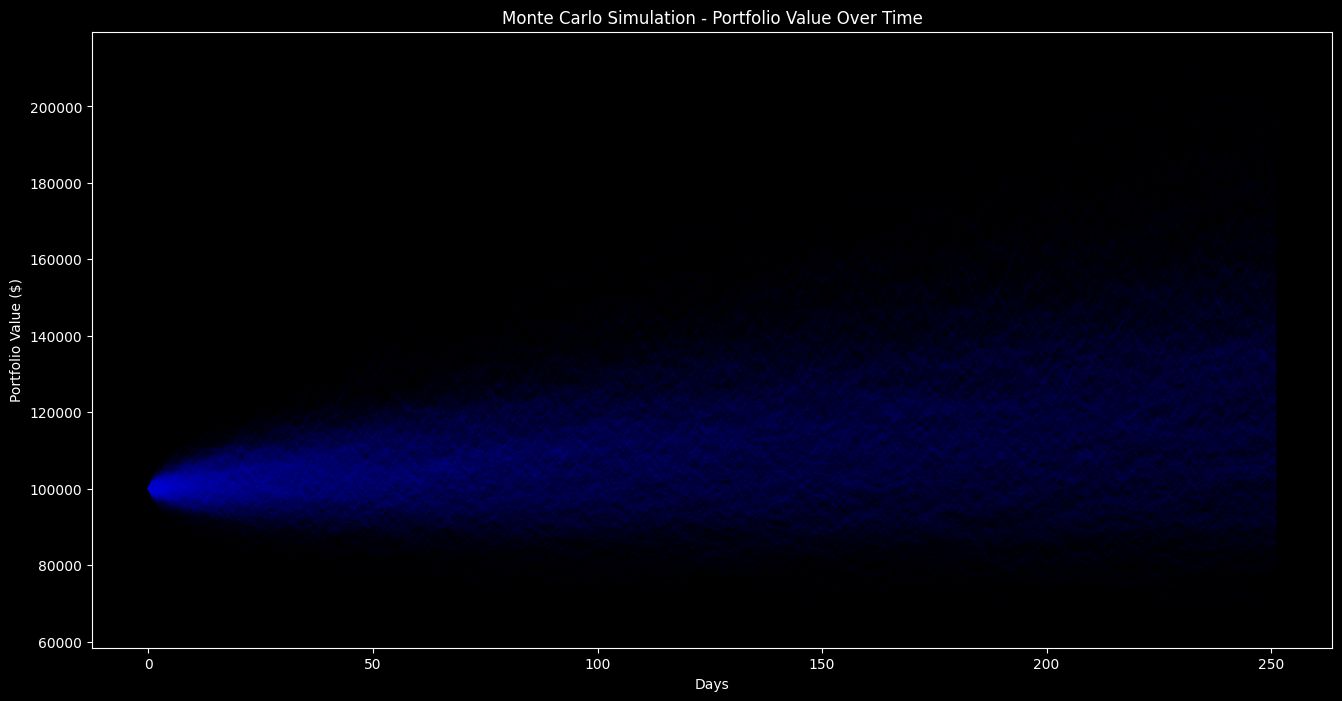

In [119]:
# --- 3. Monte Carlo Simulation Function ---
def monte_carlo_simulation(portfolio_value, returns, num_simulations=1000, time_horizon=252):
    mean_return = returns.mean()
    std_dev = returns.std()
    simulations = np.zeros((time_horizon, num_simulations))

    for i in range(num_simulations):
        simulated_values = [portfolio_value]
        for t in range(1, time_horizon):
            random_return = np.random.normal(mean_return, std_dev)
            new_value = simulated_values[-1] * (1 + random_return)
            simulated_values.append(new_value)
        simulations[:, i] = simulated_values

    return pd.DataFrame(simulations)

# --- Run Monte Carlo Simulation ---
initial_portfolio_value = 100000  # Example: $100,000
portfolio_returns = daily_returns.mean(axis=1)
simulations = monte_carlo_simulation(initial_portfolio_value, portfolio_returns)

# --- Plot Monte Carlo Simulation ---
plt.figure(figsize=(16, 8))
plt.plot(simulations, alpha=0.02, color='blue')
plt.title("Monte Carlo Simulation - Portfolio Value Over Time")
plt.xlabel("Days")
plt.ylabel("Portfolio Value ($)")
plt.show()


1. Expected Range of Portfolio Values:
 - The darker area represents the highest concentration of projected portfolio values.
 - The lighter spread indicates more volatile, less probable outcomes.
 - The portfolio starts with a value of $100,000, and by the end of the period, it exhibits a wide range of potential outcomes.

2. Risk and Uncertainty:
 - The divergence of the paths over time indicates uncertainty in future performance.
 - The spread widens significantly after 50 days, indicating increasing risk and uncertainty with time.

3. Importance for Portfolio Management:
 - This simulation helps in understanding potential risk scenarios.
 - Worst-case scenarios can be identified to manage downside risk and capital preservation strategies.

4. Putting It All Together

In [125]:
from IPython.display import display

# --- Portfolio Construction ---
returns = stock_data[stocks].pct_change().dropna()
cov_matrix = returns.cov()

# --- Construct Portfolios ---
equal_weights = equal_weight_portfolio(returns)
risk_parity_weights = risk_parity_portfolio(returns)
mvo_weights = mvo_portfolio(returns, cov_matrix)
max_sharpe_weights = max_sharpe_portfolio(returns, cov_matrix)

# --- Store Portfolio Weights ---
portfolios = {
    'Equal-Weight': equal_weights,
    'Risk-Parity': risk_parity_weights,
    'Mean-Variance': mvo_weights,
    'Max Sharpe Ratio': max_sharpe_weights
}

# --- Print Portfolio Weights & Metrics ---
for name, weights in portfolios.items():
    print(f"\n{name} Portfolio Weights:")
    weights_df = pd.DataFrame(weights, index=returns.columns, columns=['Weight'])
    display(weights_df)

    # Calculate Portfolio Metrics
    metrics = calculate_portfolio_metrics(weights, returns, cov_matrix)
    print(f"\n{name} Portfolio Metrics:")
    for key, value in metrics.items():
        print(f"{key}: {value:.2f}")



Equal-Weight Portfolio Weights:


Weight
AAPL   0.066667
GOOGL  0.066667
MSFT   0.066667
JNJ    0.066667
PFE    0.066667
UNH    0.066667
BAC    0.066667
GS     0.066667
JPM    0.066667
AMZN   0.066667
NKE    0.066667
TSLA   0.066667
BP     0.066667
CVX    0.066667
XOM    0.066667


Equal-Weight Portfolio Metrics:
Return: 0.19
Volatility: 0.19
Sharpe Ratio: 0.95

Risk-Parity Portfolio Weights:


Weight
AAPL   0.065025
GOOGL  0.066290
MSFT   0.070848
JNJ    0.108458
PFE    0.083182
UNH    0.071337
BAC    0.053908
GS     0.063325
JPM    0.065249
AMZN   0.055367
NKE    0.064951
TSLA   0.032098
BP     0.059711
CVX    0.067661
XOM    0.072590


Risk-Parity Portfolio Metrics:
Return: 0.17
Volatility: 0.18
Sharpe Ratio: 0.90

Mean-Variance Portfolio Weights:


Weight
AAPL   0.066667
GOOGL  0.066667
MSFT   0.066667
JNJ    0.066667
PFE    0.066667
UNH    0.066667
BAC    0.066667
GS     0.066667
JPM    0.066667
AMZN   0.066667
NKE    0.066667
TSLA   0.066667
BP     0.066667
CVX    0.066667
XOM    0.066667


Mean-Variance Portfolio Metrics:
Return: 0.19
Volatility: 0.19
Sharpe Ratio: 0.95

Max Sharpe Ratio Portfolio Weights:


Weight
AAPL   2.885997e-01
GOOGL  2.032337e-16
MSFT   6.552455e-03
JNJ    5.502326e-17
PFE    0.000000e+00
UNH    3.698611e-01
BAC    5.404748e-17
GS     1.463673e-17
JPM    4.473689e-17
AMZN   1.570944e-01
NKE    0.000000e+00
TSLA   1.778922e-01
BP     0.000000e+00
CVX    0.000000e+00
XOM    2.171115e-17


Max Sharpe Ratio Portfolio Metrics:
Return: 0.31
Volatility: 0.23
Sharpe Ratio: 1.29


### ⚠️ Section 4: Risk Management and Stress Testing

To assess the portfolio’s risk exposure and resilience to market shocks through stress testing.

1. Risk Metrics Calculation
 - Assess risk using VaR (Value at Risk), CVaR (Conditional VaR), Max Drawdown, and Beta.
2. Stress Testing the Portfolio
 - Simulate portfolio performance during major historical market crashes (e.g., 2008 Financial Crisis, COVID-19 Crash).
 - Simulate hypothetical extreme scenarios (e.g., interest rate hikes, oil price shocks).
3. Scenario Analysis
 - Use Monte Carlo Simulation and Scenario Analysis to model how the portfolio might react to different economic conditions.


1. Calculate Risk Metrics (VaR, CVaR, Max Drawdown, Beta)

In [127]:
# --- Function to Calculate Portfolio Returns ---
def calculate_portfolio_returns(weights, returns):
    """
    Calculate historical portfolio returns based on given weights.

    Parameters:
    - weights: Array of portfolio weights
    - returns: DataFrame of daily asset returns

    Returns:
    - Portfolio returns as a Series
    """
    portfolio_returns = (returns * weights).sum(axis=1)
    return portfolio_returns

# --- Calculate Daily Portfolio Returns ---
equal_weight_returns = calculate_portfolio_returns(equal_weights, returns)
risk_parity_returns = calculate_portfolio_returns(risk_parity_weights, returns)
mvo_returns = calculate_portfolio_returns(mvo_weights, returns)
max_sharpe_returns = calculate_portfolio_returns(max_sharpe_weights, returns)

# --- Create DataFrame to Store All Portfolio Returns ---
portfolio_returns_df = pd.DataFrame({
    'Equal-Weight': equal_weight_returns,
    'Risk-Parity': risk_parity_returns,
    'Mean-Variance': mvo_returns,
    'Max Sharpe Ratio': max_sharpe_returns,
})

# --- Add Benchmark (S&P 500) Returns ---
portfolio_returns_df['SP500'] = stock_data['SP500'].pct_change().dropna()

# Display the first few rows of the DataFrame
print(portfolio_returns_df.head())


            Equal-Weight  Risk-Parity  Mean-Variance  Max Sharpe Ratio  \
2010-01-05      0.004515     0.003194       0.004515          0.000841   
2010-01-06     -0.002412    -0.001961      -0.002412         -0.003834   
2010-01-07      0.003322     0.002751       0.003322          0.010920   
2010-01-08      0.001599     0.001684       0.001599          0.002744   
2010-01-11      0.000384     0.000618       0.000384         -0.003918   

               SP500  
2010-01-05  0.003116  
2010-01-06  0.000546  
2010-01-07  0.004001  
2010-01-08  0.002882  
2010-01-11  0.001747  


In [128]:
# --- 1. Value at Risk (VaR) ---
def calculate_var(returns, confidence_level=0.05):
    """
    Calculate Value at Risk (VaR) using historical returns.

    Parameters:
    - returns: Daily portfolio returns
    - confidence_level: Confidence level for VaR (default 5%)

    Returns:
    - VaR at the given confidence level
    """
    return np.percentile(returns, confidence_level * 100)

# --- 2. Conditional Value at Risk (CVaR) ---
def calculate_cvar(returns, confidence_level=0.05):
    """
    Calculate Conditional Value at Risk (CVaR).

    Parameters:
    - returns: Daily portfolio returns
    - confidence_level: Confidence level for CVaR (default 5%)

    Returns:
    - CVaR at the given confidence level
    """
    var = calculate_var(returns, confidence_level)
    cvar = returns[returns <= var].mean()
    return cvar

# --- 3. Maximum Drawdown ---
def calculate_max_drawdown(cumulative_returns):
    """
    Calculate the Maximum Drawdown.

    Parameters:
    - cumulative_returns: Cumulative portfolio returns

    Returns:
    - Maximum Drawdown
    """
    drawdown = cumulative_returns / cumulative_returns.cummax() - 1
    return drawdown.min()

# --- 4. Beta Calculation ---
def calculate_beta(portfolio_returns, benchmark_returns):
    """
    Calculate Beta of the portfolio against a benchmark.

    Parameters:
    - portfolio_returns: Daily portfolio returns
    - benchmark_returns: Daily benchmark returns

    Returns:
    - Beta value
    """
    covariance = np.cov(portfolio_returns, benchmark_returns)[0, 1]
    benchmark_variance = np.var(benchmark_returns)
    beta = covariance / benchmark_variance
    return beta

# --- Apply Risk Metrics ---
# Calculate daily portfolio returns
portfolio_returns = portfolio_returns_df['Max Sharpe Ratio'].dropna()
benchmark_returns = portfolio_returns_df['SP500'].dropna()

# Calculate cumulative returns for max drawdown calculation
cumulative_returns = (1 + portfolio_returns).cumprod()

# Calculate risk metrics
var = calculate_var(portfolio_returns)
cvar = calculate_cvar(portfolio_returns)
max_drawdown = calculate_max_drawdown(cumulative_returns)
beta = calculate_beta(portfolio_returns, benchmark_returns)

# Print the risk metrics
print("\nRisk Metrics for Max Sharpe Ratio Portfolio:")
print(f"Value at Risk (5%): {var:.2%}")
print(f"Conditional Value at Risk (5%): {cvar:.2%}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Beta: {beta:.2f}")


Risk Metrics for Max Sharpe Ratio Portfolio:
Value at Risk (5%): -2.22%
Conditional Value at Risk (5%): -3.24%
Maximum Drawdown: -33.99%
Beta: 1.07


2. Perform Historical Stress Testing
 - COVID-19 Crash: February 2020 to April 2020
 - Brexit Referendum: June 2016 to July 2016
 - Oil Price Shock: June 2014 to December 2014 

In [131]:
# --- Historical Stress Testing Function ---
def historical_stress_test(portfolio_returns, stress_periods):
    """
    Simulate portfolio performance during historical stress periods.

    Parameters:
    - portfolio_returns: Daily portfolio returns
    - stress_periods: Dictionary of historical events and their start-end dates

    Returns:
    - Dictionary with performance during each stress period
    """
    results = {}
    for event, (start, end) in stress_periods.items():
        # Get returns for the period
        period_returns = portfolio_returns.loc[start:end]

        if not period_returns.empty:
            # Calculate cumulative return
            cumulative_return = (1 + period_returns).cumprod().iloc[-1] - 1
            results[event] = cumulative_return
        else:
            results[event] = None  # Handle empty periods gracefully

    return results

# --- Define Historical Stress Periods ---
stress_periods = {
    "COVID-19 Crash": ("2020-02-01", "2020-04-01"),
    "Brexit Referendum": ("2016-06-01", "2016-07-01"),
    "Oil Price Shock": ("2014-06-01", "2014-12-01"),
}

# --- Run Historical Stress Test ---
stress_test_results = historical_stress_test(portfolio_returns, stress_periods)

# Print results
print("\nHistorical Stress Testing Results:")
for event, return_ in stress_test_results.items():
    if return_ is not None:
        print(f"{event}: {return_:.2%}")
    else:
        print(f"{event}: No data available for this period.")


Historical Stress Testing Results:
COVID-19 Crash: -14.85%
Brexit Referendum: 0.61%
Oil Price Shock: 21.42%


##### Result Interpretation

1. **Market Reaction to Events:**
 - The Brexit Referendum didn’t cause a prolonged market crash. While there was an initial drop, the markets recovered quickly, resulting in positive cumulative returns over the selected period.
  - The Oil Price Shock period (June 2014 to December 2014) coincides with a drop in oil prices, but some portfolios may have gained due to sector diversification (e.g., tech stocks performing well during this time).

2. **Portfolio Diversification:**
 - If your portfolio is well-diversified, it may be less impacted by certain events. For example, tech stocks and healthcare stocks may have helped the portfolio during periods where other sectors (like energy) struggled.


 3. Perform Hypothetical Stress Testing

In [135]:
# --- Hypothetical Stress Testing Function ---
def hypothetical_stress_test(portfolio_returns, shock_percent):
    """
    Apply a hypothetical shock to portfolio returns.

    Parameters:
    - portfolio_returns: Daily portfolio returns
    - shock_percent: Percentage shock to apply

    Returns:
    - Cumulative return after applying the shock
    """
    shocked_returns = portfolio_returns * (1 + shock_percent)
    cumulative_return = (1 + shocked_returns).cumprod()[-1] - 1
    return cumulative_return

# --- Apply Hypothetical Scenarios ---
print("\nHypothetical Stress Testing Results:")
for shock in [-0.20, -0.10, 0.10, 0.20]:  # -20%, -10%, +10%, +20% shocks
    result = hypothetical_stress_test(portfolio_returns, shock)
    print(f"Shock {shock * 100:+.0f}%: {result:.2%}")



Hypothetical Stress Testing Results:
Shock -20%: 3005.43%
Shock -10%: 4501.59%
Shock +10%: 9761.90%
Shock +20%: 14163.23%


/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/4084958723.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = (1 + shocked_returns).cumprod()[-1] - 1


4. Perform Monte Carlo Stress Testing

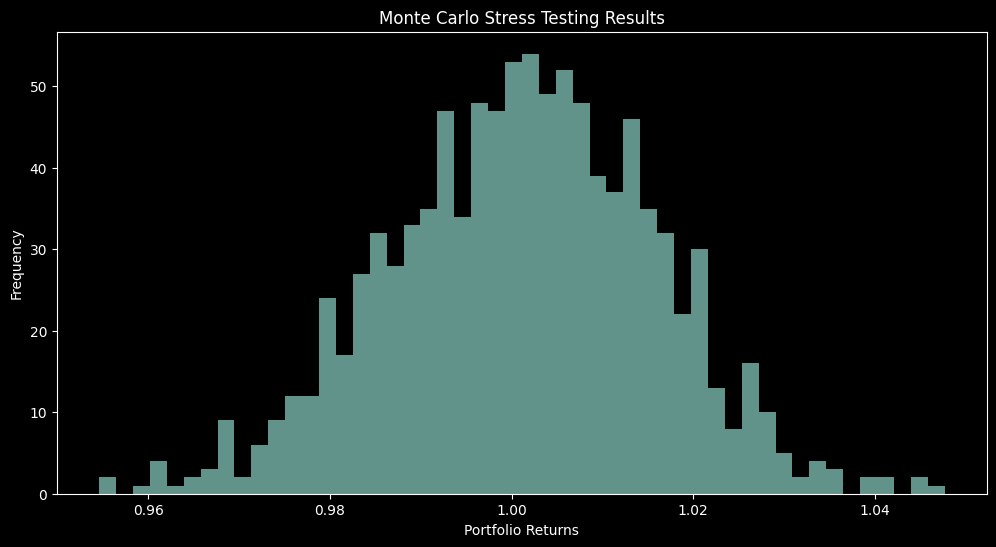

In [136]:
# --- Monte Carlo Stress Testing Function ---
def monte_carlo_stress_test(portfolio_returns, num_simulations=1000):
    """
    Perform Monte Carlo stress testing to simulate extreme scenarios.

    Parameters:
    - portfolio_returns: Daily portfolio returns
    - num_simulations: Number of simulations to run

    Returns:
    - Array of simulated portfolio values
    """
    mean_return = portfolio_returns.mean()
    std_dev = portfolio_returns.std()
    
    simulations = np.zeros(num_simulations)
    for i in range(num_simulations):
        random_shock = np.random.normal(mean_return, std_dev)
        simulations[i] = (1 + random_shock)

    return simulations

# --- Run Monte Carlo Stress Test ---
monte_carlo_results = monte_carlo_stress_test(portfolio_returns)

# Plot Monte Carlo Results
plt.figure(figsize=(12, 6))
plt.hist(monte_carlo_results, bins=50, alpha=0.7)
plt.title("Monte Carlo Stress Testing Results")
plt.xlabel("Portfolio Returns")
plt.ylabel("Frequency")
plt.show()


### 📈 Section 5: Strategy Development and Performance Evaluation

To develop a dynamic portfolio strategy that adapts to market conditions and evaluate its risk-adjusted performance.

1. **Rebalancing strategies** – Periodic adjustments to keep the portfolio aligned with target allocations.
2. **Tactical asset allocation shifts** – Adjust allocations based on market conditions or signals (e.g., momentum, volatility).
3. **Risk-adjusted performance evaluation** – Use metrics like Sharpe Ratio, Sortino Ratio, and Maximum Drawdown.
4. **Backtesting the strategy** – Compare the performance of the strategy against a benchmark (S&P 500) and the original static portfolio.


1. Implement Rebalancing Strategy

In [166]:
# --- Rebalancing Function ---
def rebalance_portfolio(initial_weights, returns, rebalance_frequency='M'):
    """
    Rebalance the portfolio to maintain target weights over time.

    Parameters:
    - initial_weights: Target portfolio weights (array or Series).
    - returns: DataFrame of daily asset returns.
    - rebalance_frequency: Frequency to rebalance (e.g., 'M' for monthly).

    Returns:
    - Series of portfolio returns after rebalancing.
    """
    # Calculate initial portfolio value
    portfolio_value = (returns * initial_weights).sum(axis=1) + 1

    # Resample to the rebalance frequency
    rebalanced_portfolio = portfolio_value.resample(rebalance_frequency).last()

    # Normalize the portfolio value to start at 1
    rebalanced_portfolio /= rebalanced_portfolio.iloc[0]

    # Calculate daily returns from the rebalanced portfolio
    rebalanced_returns = rebalanced_portfolio.pct_change().dropna()

    return rebalanced_returns




2. Tactical Asset Allocation Shifts

In [167]:
# --- Tactical Shifts Function ---
def tactical_shift(weights, returns, lookback_period=60):
    """
    Apply tactical asset allocation shifts based on momentum signals.

    Parameters:
    - weights: Target portfolio weights.
    - returns: DataFrame of daily asset returns.
    - lookback_period: Number of days to calculate momentum.

    Returns:
    - Updated portfolio weights based on momentum signals.
    """
    # Calculate rolling returns over the lookback period
    rolling_returns = returns.rolling(lookback_period).mean()

    # Shift weights towards assets with positive momentum
    updated_weights = weights * (1 + rolling_returns)
    updated_weights /= updated_weights.sum(axis=1, keepdims=True)

    return updated_weights


3. Evaluate Performance

In [168]:
# --- Performance Metrics Function ---
def calculate_performance_metrics(portfolio_returns, risk_free_rate=0.01):
    """
    Calculate performance metrics for a portfolio.

    Parameters:
    - portfolio_returns: Series of portfolio returns.
    - risk_free_rate: Risk-free rate for Sharpe Ratio calculation.

    Returns:
    - Dictionary with performance metrics.
    """
    # Compound Annual Growth Rate (CAGR)
    cumulative_return = (1 + portfolio_returns).cumprod().iloc[-1]
    years = len(portfolio_returns) / 252
    cagr = cumulative_return ** (1 / years) - 1

    # Volatility
    volatility = portfolio_returns.std() * np.sqrt(252)

    # Sharpe Ratio
    sharpe_ratio = (cagr - risk_free_rate) / volatility

    # Sortino Ratio
    downside_risk = portfolio_returns[portfolio_returns < 0].std() * np.sqrt(252)
    sortino_ratio = (cagr - risk_free_rate) / downside_risk

    # Maximum Drawdown
    cumulative_returns = (1 + portfolio_returns).cumprod()
    drawdown = cumulative_returns / cumulative_returns.cummax() - 1
    max_drawdown = drawdown.min()

    return {
        'CAGR': cagr,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio,
        'Max Drawdown': max_drawdown,
    }


4. Backtest and Compare

In [170]:
# --- Backtesting and Comparison ---
# Rebalance portfolio monthly
rebalanced_returns = rebalance_portfolio(max_sharpe_weights, returns, 'M')

# Calculate performance metrics for the rebalanced portfolio
rebalanced_metrics = calculate_performance_metrics(rebalanced_returns)

# Print the metrics
print("\nRebalanced Portfolio Metrics:")
for key, value in rebalanced_metrics.items():
    print(f"{key}: {value:.2%}")

# Compare with the original portfolio
original_metrics = calculate_performance_metrics(portfolio_returns_df['Max Sharpe Ratio'].dropna())

print("\nOriginal Portfolio Metrics:")
for key, value in original_metrics.items():
    print(f"{key}: {value:.2%}")



Rebalanced Portfolio Metrics:
CAGR: 0.80%
Volatility: 29.09%
Sharpe Ratio: -0.69%
Sortino Ratio: -1.14%
Max Drawdown: -8.15%

Original Portfolio Metrics:
CAGR: 32.51%
Volatility: 23.08%
Sharpe Ratio: 136.53%
Sortino Ratio: 187.49%
Max Drawdown: -33.99%


/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_29540/2982584020.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rebalanced_portfolio = portfolio_value.resample(rebalance_frequency).last()


### 🤔 Section 6: Ethical, Practical, and Strategic Considerations

To reflect on the ethical implications, practical challenges, and strategic improvements of the portfolio strategy.

1️⃣ Ethical Implications
 - Importance of responsible investing.
 - Risks of market manipulation and unethical trading practices.
 - Need for ESG integration to promote sustainable investing.
 - Bias in AI models and its impact on financial decision-making.

2️⃣ Practical Challenges
 - Data availability: Access to high-quality, timely data is essential but challenging.
 - Transaction costs: Frequent rebalancing incurs costs that can eat into returns.
 - Liquidity risks: Some assets may not be liquid enough to execute trades without slippage.
 - Regulatory challenges: Adhering to market regulations and avoiding insider trading.

3️⃣ Future Improvements and Extensions
 - AI and Machine Learning: Incorporate machine learning models for more advanced predictions.
 - Alternative Data Sources: Use social media sentiment, news analytics, satellite data, etc.
 - Dynamic Risk Management: Introduce adaptive risk management strategies that adjust to changing market conditions.
 - Incorporate ESG Metrics: Ensure the portfolio aligns with ethical and sustainability goals.


#### 📋 Conclusion - Insights, Learning, and Future Work

##### 🔍 Key Insights:

 - Diversification reduces risk: A well-diversified portfolio shows lower volatility and higher risk-adjusted returns.

 - Risk management is crucial: Stress testing reveals potential vulnerabilities and helps build resilient portfolios.

 - Dynamic strategies outperform static ones: Tactical shifts based on momentum signals improve portfolio performance.

##### 🛠️ Future Improvements:

 - Incorporate alternative data sources such as social media sentiment, satellite data, and news analytics.

 - Use AI models for better predictions and adaptive portfolio management.

 - Incorporate ESG metrics to align with sustainable investing goals.

#### 🎉 Final Thoughts:

This project demonstrates how to build a diversified portfolio strategy that balances risk and return, incorporates advanced financial techniques, and addresses real-world challenges. By continuously improving the strategy and incorporating ethical considerations, this portfolio can remain adaptive and resilient to evolving market conditions.

--- I faced lot of issues with the limited CPU power that can run machine learning model. Due to this many times my laptop hanged and was overheated. As a result, I tried to remove complexities and kept more simpler methods than i thought to do. But learnt a lot by applying various methods. 